In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns

#DOMO data pipeline dependencies
from lxml import html
import requests
import csv
import json
import os
import sys
import time
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
    

import statsmodels.api as sm
import statsmodels.tsa.api as smt 

C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## differences

### IDEAS
- Difference versus intel
- genetic algos

# Data reading

## Page views

In [26]:
page1 = pd.read_csv("page_events1_intel.csv")
page2 = pd.read_csv("page_events2_intel.csv")

pages_target = pd.concat([page1,page2])

pages_target.idate = pd.to_datetime(pages_target.idate)
views_all =  pages_target.groupby('idate').size()

In [27]:
pages_target

,browser_family,geo_city,geo_country,keyword,category,os_family,page_url,domain,geo_region,user_agent,user_domain,user_id,ip_address,bid_time,idate
0,IE,Saint Peters,USA,multi core embed,DEV_IOT,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:41:39.000Z,2017-07-31
1,IE,Saint Peters,USA,multi core embed,DEV_IOT,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:41:39.000Z,2017-07-31
2,IE,Saint Peters,USA,multi core embed,DEV_IOT,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:42:05.000Z,2017-07-31
3,IE,Saint Peters,USA,multi core embed,DEV_IOT,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:42:05.000Z,2017-07-31
4,Safari,Madison,USA,spark stream,BIG_DATA_REAL_TIME,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/WI,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,hoyosconsulting.com,bito.AAC3ak6yc3wAAC2oxTVXNw,162.248.233.46,2017-06-15T21:37:54.000Z,2017-06-15
5,Safari,Madison,USA,spark stream,AWS_NOSQL,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/WI,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,hoyosconsulting.com,bito.AAC3ak6yc3wAAC2oxTVXNw,162.248.233.46,2017-06-15T21:37:54.000Z,2017-06-15
6,Chrome,NaN,USA,spark stream,AWS_NOSQL,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/VA,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,capitalone.com,bito.AKF7JU6xpScAABqUcVOqYQ,199.244.214.0,2017-03-27T22:03:11.000Z,2017-03-27
7,Chrome,NaN,USA,spark stream,BIG_DATA_REAL_TIME,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/VA,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,capitalone.com,bito.AKF7JU6xpScAABqUcVOqYQ,199.244.214.0,2017-03-27T22:03:15.000Z,2017-03-27
8,Chrome,NaN,USA,spark stream,AWS_NOSQL,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/VA,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,capitalone.com,bito.AKF7JU6xpScAABqUcVOqYQ,199.244.214.0,2017-03-27T22:03:15.000Z,2017-03-27
9,Chrome,Cambridge,USA,spark stream,AWS_NOSQL,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/MA,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,techtarget.com,bito.AAAMl06vnloAADtfrJ7CQw,172.85.50.0,2017-03-16T19:11:44.000Z,2017-03-16


limit_output extension: Maximum message size of 10000 exceeded with 33321 characters

In [28]:
dec = pages_target.sort_values(by=['idate'], ascending=True)

In [29]:
pages_target.head()

,browser_family,geo_city,geo_country,keyword,category,os_family,page_url,domain,geo_region,user_agent,user_domain,user_id,ip_address,bid_time,idate
0,IE,Saint Peters,USA,multi core embed,DEV_IOT,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:41:39.000Z,2017-07-31
1,IE,Saint Peters,USA,multi core embed,DEV_IOT,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:41:39.000Z,2017-07-31
2,IE,Saint Peters,USA,multi core embed,DEV_IOT,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:42:05.000Z,2017-07-31
3,IE,Saint Peters,USA,multi core embed,DEV_IOT,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:42:05.000Z,2017-07-31
4,Safari,Madison,USA,spark stream,BIG_DATA_REAL_TIME,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/WI,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,hoyosconsulting.com,bito.AAC3ak6yc3wAAC2oxTVXNw,162.248.233.46,2017-06-15T21:37:54.000Z,2017-06-15


In [91]:
domains = pages_target.groupby('idate')['domain'].agg(['count'])

In [89]:
for i in range(len(pages_target)):
    if pages_target.domain in final_pubs.index:
        pages_target['category']

KeyError: "['2017-07-31T00:00:00.000000000' '2017-06-15T00:00:00.000000000'\n '2017-03-27T00:00:00.000000000' '2017-03-16T00:00:00.000000000'\n '2017-05-11T00:00:00.000000000' '2017-05-23T00:00:00.000000000'\n '2017-06-21T00:00:00.000000000' '2017-06-20T00:00:00.000000000'\n '2017-08-01T00:00:00.000000000' '2017-06-26T00:00:00.000000000'\n '2017-06-14T00:00:00.000000000' '2017-06-30T00:00:00.000000000'\n '2017-05-30T00:00:00.000000000' '2017-06-23T00:00:00.000000000'\n '2017-06-01T00:00:00.000000000' '2017-06-02T00:00:00.000000000'\n '2017-08-07T00:00:00.000000000' '2017-06-22T00:00:00.000000000'\n '2017-06-06T00:00:00.000000000' '2017-05-15T00:00:00.000000000'\n '2017-06-09T00:00:00.000000000' '2017-05-19T00:00:00.000000000'\n '2017-05-16T00:00:00.000000000' '2017-05-24T00:00:00.000000000'\n '2017-08-30T00:00:00.000000000' '2017-08-29T00:00:00.000000000'\n '2017-08-17T00:00:00.000000000' '2017-06-28T00:00:00.000000000'\n '2017-08-21T00:00:00.000000000' '2017-06-13T00:00:00.000000000'\n '2017-04-03T00:00:00.000000000' '2017-03-24T00:00:00.000000000'\n '2017-04-21T00:00:00.000000000' '2017-03-13T00:00:00.000000000'\n '2017-03-20T00:00:00.000000000' '2017-08-25T00:00:00.000000000'\n '2017-03-31T00:00:00.000000000' '2017-04-06T00:00:00.000000000'\n '2017-03-19T00:00:00.000000000' '2017-04-04T00:00:00.000000000'\n '2017-06-25T00:00:00.000000000' '2017-06-27T00:00:00.000000000'\n '2017-08-16T00:00:00.000000000' '2017-08-09T00:00:00.000000000'\n '2017-06-12T00:00:00.000000000' '2017-07-28T00:00:00.000000000'\n '2017-07-11T00:00:00.000000000' '2017-07-14T00:00:00.000000000'\n '2017-08-15T00:00:00.000000000' '2017-08-14T00:00:00.000000000'\n '2017-07-13T00:00:00.000000000' '2017-07-03T00:00:00.000000000'\n '2017-07-19T00:00:00.000000000' '2017-08-03T00:00:00.000000000'\n '2017-07-21T00:00:00.000000000' '2017-07-24T00:00:00.000000000'\n '2017-08-04T00:00:00.000000000' '2017-07-12T00:00:00.000000000'\n '2017-07-06T00:00:00.000000000' '2017-08-02T00:00:00.000000000'\n '2017-07-26T00:00:00.000000000' '2017-07-25T00:00:00.000000000'\n '2017-07-10T00:00:00.000000000' '2017-06-08T00:00:00.000000000'\n '2017-07-07T00:00:00.000000000' '2017-08-31T00:00:00.000000000'\n '2017-07-22T00:00:00.000000000' '2017-05-03T00:00:00.000000000'\n '2017-05-08T00:00:00.000000000' '2017-04-28T00:00:00.000000000'\n '2017-04-27T00:00:00.000000000' '2017-04-13T00:00:00.000000000'\n '2017-04-23T00:00:00.000000000' '2017-04-24T00:00:00.000000000'\n '2017-05-10T00:00:00.000000000' '2017-04-26T00:00:00.000000000'\n '2017-05-01T00:00:00.000000000' '2017-08-24T00:00:00.000000000'\n '2017-09-01T00:00:00.000000000' '2017-08-10T00:00:00.000000000'\n '2017-07-23T00:00:00.000000000' '2017-07-15T00:00:00.000000000'\n '2017-08-28T00:00:00.000000000' '2017-08-08T00:00:00.000000000'\n '2017-04-07T00:00:00.000000000' '2017-03-30T00:00:00.000000000'\n '2017-07-05T00:00:00.000000000' '2017-03-15T00:00:00.000000000'\n '2017-08-11T00:00:00.000000000' '2017-08-18T00:00:00.000000000'\n '2017-08-23T00:00:00.000000000' '2017-08-22T00:00:00.000000000'\n '2017-07-27T00:00:00.000000000' '2017-04-05T00:00:00.000000000'\n '2017-05-26T00:00:00.000000000' '2017-05-02T00:00:00.000000000'\n '2017-04-16T00:00:00.000000000' '2017-03-25T00:00:00.000000000'\n '2017-07-16T00:00:00.000000000' '2017-04-11T00:00:00.000000000'\n '2017-07-17T00:00:00.000000000' '2017-07-20T00:00:00.000000000'\n '2017-07-18T00:00:00.000000000' '2017-06-05T00:00:00.000000000'\n '2017-06-19T00:00:00.000000000' '2017-06-07T00:00:00.000000000'\n '2017-05-05T00:00:00.000000000' '2017-04-01T00:00:00.000000000'\n '2017-06-11T00:00:00.000000000' '2017-06-16T00:00:00.000000000'\n '2017-08-27T00:00:00.000000000' '2017-06-29T00:00:00.000000000'\n '2017-07-29T00:00:00.000000000' '2017-08-19T00:00:00.000000000'\n '2017-08-06T00:00:00.000000000' '2017-04-20T00:00:00.000000000'\n '2017-08-05T00:00:00.000000000' '2017-08-13T00:00:00.000000000'\n '2017-07-04T00:00:00.000000000' '2017-04-12T00:00:00.000000000'\n '2017-04-15T00:00:00.000000000' '2017-05-21T00:00:00.000000000'\n '2017-04-09T00:00:00.000000000' '2017-04-22T00:00:00.000000000'\n '2017-05-22T00:00:00.000000000' '2017-05-14T00:00:00.000000000'\n '2017-04-14T00:00:00.000000000' '2017-05-25T00:00:00.000000000'\n '2017-08-26T00:00:00.000000000' '2017-03-14T00:00:00.000000000'\n '2017-03-23T00:00:00.000000000' '2017-03-22T00:00:00.000000000'\n '2017-04-25T00:00:00.000000000' '2017-04-18T00:00:00.000000000'\n '2017-05-09T00:00:00.000000000' '2017-07-30T00:00:00.000000000'\n '2017-08-20T00:00:00.000000000' '2017-05-04T00:00:00.000000000'\n '2017-04-10T00:00:00.000000000' '2017-04-17T00:00:00.000000000'\n '2017-06-24T00:00:00.000000000' '2017-05-29T00:00:00.000000000'\n '2017-06-17T00:00:00.000000000' '2017-06-03T00:00:00.000000000'\n '2017-03-21T00:00:00.000000000' '2017-05-20T00:00:00.000000000'\n '2017-05-12T00:00:00.000000000' '2017-05-17T00:00:00.000000000'\n '2017-05-18T00:00:00.000000000' '2017-05-13T00:00:00.000000000'\n '2017-03-26T00:00:00.000000000' '2017-04-19T00:00:00.000000000'\n '2017-04-30T00:00:00.000000000' '2017-04-08T00:00:00.000000000'\n '2017-03-29T00:00:00.000000000' '2017-05-07T00:00:00.000000000'\n '2017-04-29T00:00:00.000000000' '2017-07-08T00:00:00.000000000'\n '2017-05-06T00:00:00.000000000' '2017-06-18T00:00:00.000000000'\n '2017-03-17T00:00:00.000000000' '2017-07-01T00:00:00.000000000'\n '2017-08-12T00:00:00.000000000' '2017-06-10T00:00:00.000000000'\n '2017-03-28T00:00:00.000000000' '2017-06-04T00:00:00.000000000'\n '2017-05-31T00:00:00.000000000' '2017-07-09T00:00:00.000000000'\n '2017-07-02T00:00:00.000000000' '2017-03-18T00:00:00.000000000'\n '2017-05-28T00:00:00.000000000' '2017-05-27T00:00:00.000000000'\n '2017-04-02T00:00:00.000000000' '2017-11-15T00:00:00.000000000'\n '2017-09-14T00:00:00.000000000' '2017-09-20T00:00:00.000000000'\n '2017-09-02T00:00:00.000000000' '2017-09-12T00:00:00.000000000'\n '2017-09-03T00:00:00.000000000' '2017-09-11T00:00:00.000000000'\n '2017-09-15T00:00:00.000000000' '2017-09-06T00:00:00.000000000'\n '2017-09-17T00:00:00.000000000' '2017-09-18T00:00:00.000000000'\n '2017-09-28T00:00:00.000000000' '2017-10-31T00:00:00.000000000'\n '2017-11-02T00:00:00.000000000' '2017-09-29T00:00:00.000000000'\n '2017-09-07T00:00:00.000000000' '2017-11-26T00:00:00.000000000'\n '2017-12-01T00:00:00.000000000' '2017-12-07T00:00:00.000000000'\n '2017-11-18T00:00:00.000000000' '2017-12-06T00:00:00.000000000'\n '2017-12-21T00:00:00.000000000' '2017-12-08T00:00:00.000000000'\n '2017-10-07T00:00:00.000000000' '2017-09-27T00:00:00.000000000'\n '2017-11-23T00:00:00.000000000' '2017-09-24T00:00:00.000000000'\n '2017-10-05T00:00:00.000000000' '2017-10-03T00:00:00.000000000'\n '2017-09-19T00:00:00.000000000' '2017-09-22T00:00:00.000000000'\n '2017-09-08T00:00:00.000000000' '2017-10-02T00:00:00.000000000'\n '2017-10-12T00:00:00.000000000' '2017-10-13T00:00:00.000000000'\n '2017-11-01T00:00:00.000000000' '2017-10-23T00:00:00.000000000'\n '2017-10-09T00:00:00.000000000' '2017-11-10T00:00:00.000000000'\n '2017-10-17T00:00:00.000000000' '2017-10-26T00:00:00.000000000'\n '2017-11-13T00:00:00.000000000' '2017-10-30T00:00:00.000000000'\n '2017-11-03T00:00:00.000000000' '2017-10-15T00:00:00.000000000'\n '2017-11-17T00:00:00.000000000' '2017-09-05T00:00:00.000000000'\n '2017-10-04T00:00:00.000000000' '2017-11-24T00:00:00.000000000'\n '2017-11-11T00:00:00.000000000' '2017-10-24T00:00:00.000000000'\n '2017-10-25T00:00:00.000000000' '2017-10-27T00:00:00.000000000'\n '2017-09-04T00:00:00.000000000' '2017-11-29T00:00:00.000000000'\n '2017-11-30T00:00:00.000000000' '2017-10-10T00:00:00.000000000'\n '2017-12-13T00:00:00.000000000' '2017-11-21T00:00:00.000000000'\n '2017-10-01T00:00:00.000000000' '2017-11-19T00:00:00.000000000'\n '2017-11-27T00:00:00.000000000' '2017-11-04T00:00:00.000000000'\n '2017-12-12T00:00:00.000000000' '2017-11-20T00:00:00.000000000'\n '2017-11-28T00:00:00.000000000' '2017-12-14T00:00:00.000000000'\n '2017-09-13T00:00:00.000000000' '2017-12-27T00:00:00.000000000'\n '2017-12-25T00:00:00.000000000' '2017-12-04T00:00:00.000000000'\n '2017-12-11T00:00:00.000000000' '2017-10-06T00:00:00.000000000'\n '2017-11-09T00:00:00.000000000' '2017-12-19T00:00:00.000000000'\n '2017-11-08T00:00:00.000000000' '2017-11-22T00:00:00.000000000'\n '2017-09-25T00:00:00.000000000' '2017-10-18T00:00:00.000000000'\n '2017-09-30T00:00:00.000000000' '2017-11-07T00:00:00.000000000'\n '2017-10-20T00:00:00.000000000' '2017-10-19T00:00:00.000000000'\n '2017-10-29T00:00:00.000000000' '2017-10-11T00:00:00.000000000'\n '2017-10-16T00:00:00.000000000' '2017-12-24T00:00:00.000000000'\n '2017-12-20T00:00:00.000000000' '2017-09-26T00:00:00.000000000'\n '2017-11-06T00:00:00.000000000' '2017-10-21T00:00:00.000000000'\n '2017-09-09T00:00:00.000000000' '2017-12-28T00:00:00.000000000'\n '2017-12-16T00:00:00.000000000' '2017-12-15T00:00:00.000000000'\n '2017-12-26T00:00:00.000000000' '2017-11-14T00:00:00.000000000'\n '2017-12-10T00:00:00.000000000' '2017-12-05T00:00:00.000000000'\n '2017-12-29T00:00:00.000000000' '2017-12-23T00:00:00.000000000'\n '2017-12-18T00:00:00.000000000' '2017-10-22T00:00:00.000000000'\n '2017-09-10T00:00:00.000000000' '2017-10-08T00:00:00.000000000'\n '2017-11-16T00:00:00.000000000' '2017-11-25T00:00:00.000000000'\n '2017-12-02T00:00:00.000000000' '2017-09-23T00:00:00.000000000'\n '2017-12-09T00:00:00.000000000' '2017-09-21T00:00:00.000000000'\n '2017-10-28T00:00:00.000000000' '2017-12-17T00:00:00.000000000'\n '2017-11-12T00:00:00.000000000' '2017-11-05T00:00:00.000000000'\n '2017-10-14T00:00:00.000000000' '2017-12-22T00:00:00.000000000'\n '2017-12-31T00:00:00.000000000' '2017-09-16T00:00:00.000000000'\n '2017-12-30T00:00:00.000000000' '2017-12-03T00:00:00.000000000'] not in index"

In [98]:
test = pages_target[pages_target['domain'].isin(final_pubs['index'])]

In [119]:
test['type'] = 'cat'

C:\Users\Laurens\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
test.columns

Index(['browser_family', 'geo_city', 'geo_country', 'keyword', 'category',
       'os_family', 'page_url', 'domain', 'geo_region', 'user_agent',
       'user_domain', 'user_id', 'ip_address', 'bid_time', 'idate', 'type'],
      dtype='object')

In [123]:
test.loc[pages_target['domain'].isin(business2), 'type'] = 'business'



ValueError: cannot reindex from a duplicate axis

In [132]:
test['type'] = test.domain.apply(lambda x: 'business' if x in business2.values else 'tech')

C:\Users\Laurens\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
'businessinsider.com' in business2.values

True

In [144]:
pived = pd.get_dummies(test, prefix=['type_'], columns = ['type'])

In [145]:
pived

,browser_family,geo_city,geo_country,keyword,category,os_family,page_url,domain,geo_region,user_agent,user_domain,user_id,ip_address,bid_time,idate,type__business,type__tech
0,IE,Saint Peters,USA,multi core embed,cat,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:41:39.000Z,2017-07-31,0,1
1,IE,Saint Peters,USA,multi core embed,cat,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:41:39.000Z,2017-07-31,0,1
2,IE,Saint Peters,USA,multi core embed,cat,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:42:05.000Z,2017-07-31,0,1
3,IE,Saint Peters,USA,multi core embed,cat,Windows,https://www.researchgate.net/publication/29052...,researchgate.net,USA/MO,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,eds.com,bito.AAB8QE6y_p8AACX2aelRFA,134.244.29.2,2017-07-31T15:42:05.000Z,2017-07-31,0,1
4,Safari,Madison,USA,spark stream,cat,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/WI,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,hoyosconsulting.com,bito.AAC3ak6yc3wAAC2oxTVXNw,162.248.233.46,2017-06-15T21:37:54.000Z,2017-06-15,0,1
5,Safari,Madison,USA,spark stream,cat,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/WI,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,hoyosconsulting.com,bito.AAC3ak6yc3wAAC2oxTVXNw,162.248.233.46,2017-06-15T21:37:54.000Z,2017-06-15,0,1
6,Chrome,NaN,USA,spark stream,cat,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/VA,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,capitalone.com,bito.AKF7JU6xpScAABqUcVOqYQ,199.244.214.0,2017-03-27T22:03:11.000Z,2017-03-27,0,1
7,Chrome,NaN,USA,spark stream,cat,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/VA,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,capitalone.com,bito.AKF7JU6xpScAABqUcVOqYQ,199.244.214.0,2017-03-27T22:03:15.000Z,2017-03-27,0,1
8,Chrome,NaN,USA,spark stream,cat,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/VA,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,capitalone.com,bito.AKF7JU6xpScAABqUcVOqYQ,199.244.214.0,2017-03-27T22:03:15.000Z,2017-03-27,0,1
9,Chrome,Cambridge,USA,spark stream,cat,Mac OS X,https://mvnrepository.com/artifact/org.apache....,mvnrepository.com,USA/MA,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,techtarget.com,bito.AAAMl06vnloAADtfrJ7CQw,172.85.50.0,2017-03-16T19:11:44.000Z,2017-03-16,0,1


limit_output extension: Maximum message size of 10000 exceeded with 35153 characters

In [151]:
test_agg = pived.groupby('idate')['type__business', 'type__tech'].agg(['sum'])

In [153]:
test_agg.to_csv('categories_byday.csv')

In [154]:
test_agg

,type__business,type__tech
,sum,sum
idate,,
2017-03-13,14030.0,6345.0
2017-03-14,30190.0,5605.0
2017-03-15,26686.0,8438.0
2017-03-16,5553.0,2841.0
2017-03-17,4539.0,9614.0
2017-03-18,429.0,1324.0
2017-03-19,2353.0,3224.0
2017-03-20,16801.0,13624.0


# publishers

In [32]:
len(pages_target.domain.value_counts())

3813

In [33]:
values = pages_target.domain.value_counts()

In [34]:
values = pd.DataFrame(values)

In [39]:
pubs =pages_target.groupby("domain").filter(lambda x: len(x) > 1000)

In [47]:
publications = pubs.domain.value_counts()

In [37]:
pubs_cats = pd.DataFrame(publications, columns = ['pubs', 'category'])

In [45]:
publications['category'] = 'cat'

In [52]:
pubs_cats = pd.DataFrame(publications)

In [58]:
pubs_cats['category'] = 1

In [72]:
business = [0, 1, 4, 11,13, 14,17,18,19,21,24,26,27,28,30,32,34,35,38,39,41,42,43,49]
tech = [2,3,5, 6,7,8,9,10,12,15,16,20,22,23,25,29,31,33,36,37,40,44,45,46,48,47]

In [118]:
business2

0              businessinsider.com
1                  venturebeat.com
4                      fortune.com
11                seekingalpha.com
13         smallbusiness.chron.com
14                       chron.com
17               digitaltrends.com
18                   cyberciti.biz
19               finance.yahoo.com
21                   techtimes.com
24    economictimes.indiatimes.com
26                 wonderhowto.com
27                    dailydot.com
28                  online.wsj.com
30                 theguardian.com
32                     gizmodo.com
34                     ibtimes.com
35                     answers.com
38                    wareable.com
39                       zdnet.com
41                   themerkle.com
42                    slashdot.org
43                 mentalfloss.com
49            commercialappeal.com
Name: index, dtype: object

In [116]:
business2 = final_pubs.loc[business,'index']
tech2 = final_pubs.loc[tech,'index']

In [60]:
pubs_cats.reset_index(inplace=True)

In [73]:
pubs_cats.loc[business, 'category'] = 'business'
pubs_cats.loc[tech,'category'] = 'tech'


In [78]:
final_pubs = pubs_cats.iloc[:50,:]

In [121]:
final_pubs

,index,domain,category
0,businessinsider.com,1.21196e+06,business
1,venturebeat.com,926048,business
2,reddit.com,622088,tech
3,crunchify.com,585838,tech
4,fortune.com,576708,business
5,analyticsvidhya.com,511076,tech
6,wired.com,482244,tech
7,theverge.com,399454,tech
8,arstechnica.com,347524,tech
9,makeuseof.com,307688,tech


In [83]:
final_pubs.to_csv("final_pubs.csv",index=False)

# Kantar deep dive

In [3]:
kantar = pd.read_csv("kantar_cleaned_weekly_p.csv")

In [5]:
pd.options.display.max_columns = 500
kantar.columns

Index(['week', 'Adobe Systems Inc_B-to-B', 'Adobe Systems Inc_Cable TV',
       'Adobe Systems Inc_Int Display', 'Adobe Systems Inc_Int Search',
       'Adobe Systems Inc_Local Radio', 'Adobe Systems Inc_Mobile Web',
       'Adobe Systems Inc_Natl Newsp', 'Adobe Systems Inc_Network TV',
       'Adobe Systems Inc_Online Video',
       ...
       'Xerox Corp_Local Radio', 'Xerox Corp_Magazines',
       'Xerox Corp_Mobile Web', 'Xerox Corp_Natl Newsp',
       'Xerox Corp_Natl Spot Radio', 'Xerox Corp_Network TV',
       'Xerox Corp_Newspapers', 'Xerox Corp_Online Video',
       'Xerox Corp_Outdoor', 'Xerox Corp_Spot TV'],
      dtype='object', length=376)

In [6]:
intel_cols = [col for col in kantar.columns if 'Intel' in col]

In [16]:
intel_cols = kantar.filter(regex='Intel')

In [17]:
intel_cols

,Intel Corp_B-to-B,Intel Corp_Cable TV,Intel Corp_Cinema,Intel Corp_Hispanic Mags,Intel Corp_Hispanic Newsp,Intel Corp_Int Display,Intel Corp_Int Search,Intel Corp_Local Radio,Intel Corp_Magazines,Intel Corp_Mobile Web,Intel Corp_Natl Newsp,Intel Corp_Natl Spot Radio,Intel Corp_Network Radio,Intel Corp_Network TV,Intel Corp_Newspapers,Intel Corp_Online Video,Intel Corp_Outdoor,Intel Corp_Spot TV,Intel Corp_Syndication
0,0.000000,19.980000,NaN,0.0,0.0,1.165000,31.375,0.000,0.0,0.000000,NaN,0.0,0.0,3.025,0.000,2.68000,4.3000,0.000000,0.00
1,0.000000,0.000000,NaN,0.0,0.0,0.175000,23.500,0.000,0.0,0.000000,NaN,0.0,0.0,0.000,0.000,0.00000,0.0000,0.000000,0.00
2,0.000000,0.000000,NaN,0.0,0.0,0.390833,23.500,0.000,0.0,0.000000,NaN,0.0,0.0,0.000,0.000,0.00000,0.0000,0.000000,0.00
3,0.000000,0.000000,NaN,0.0,0.0,0.255000,23.500,0.000,0.0,0.000000,NaN,0.0,0.0,0.000,0.000,0.07200,0.0000,0.000000,0.00
4,0.000000,0.000000,NaN,0.0,0.0,3.106667,24.225,0.000,0.0,0.000000,NaN,0.0,0.0,0.000,0.000,0.15600,8.9400,0.000000,0.00
5,0.000000,0.000000,NaN,0.0,0.0,5.758333,28.750,0.000,0.0,0.000000,NaN,0.0,0.0,0.000,0.000,0.02400,0.0000,0.000000,0.00
6,0.000000,478.320000,NaN,0.0,0.0,6.170833,28.750,0.000,0.0,0.000000,NaN,0.0,0.0,836.200,0.000,0.49600,0.0000,0.416667,0.00
7,0.000000,547.420000,NaN,0.0,0.0,4.319167,28.750,0.000,0.0,0.000000,NaN,0.0,0.0,731.225,0.000,1.31600,0.0000,0.133333,0.00
8,11.933333,574.020000,NaN,0.0,0.0,4.135000,30.475,0.000,77.5,0.000000,NaN,0.0,0.0,745.375,0.000,0.91200,0.6000,0.283333,0.00
9,0.000000,1.660000,NaN,0.0,0.0,3.092500,40.850,0.000,0.0,0.000000,NaN,0.2,0.0,0.000,0.000,0.90000,0.0000,0.150000,0.00


limit_output extension: Maximum message size of 10000 exceeded with 30286 characters

## geoips

In [2482]:
dec2 = dec.iloc[-1000:,:]

In [2485]:
dec2.reset_index(inplace=True, drop=True)

In [2488]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()



coords = pd.DataFrame(columns=['lat', 'lon'])
for i in range(len(dec2)):
    location = geolocator.geocode(dec2.loc[i, 'geo_city'], timeout=1.5)
    lat = location.latitude
    lon = location.longitude
    coords.loc[i, 'lat'] = lat
    coords.loc[i, 'lon'] = lon



GeocoderTimedOut: Service timed out

In [2487]:
coords.shape

(438, 2)

### Comments

In [2417]:
import glob

path = r'C:\Users\Laurens\Documents\IE-BIGDATA\Hackathons\I-COM datathon'
allFiles = glob.glob(path + "/intel_*.csv")

concats = []

for file in allFiles:
    comments = pd.read_csv(file)
    concats.append(comments)

comments_target = pd.concat(concats)

comments_target.drop(["Unnamed: 0"], inplace=True, axis=1)
comments_target.date = pd.to_datetime(comments_target.date)
comments_target['day'] = comments_target['date'].dt.date
comments_all = comments_target.groupby('day').size()

KeyboardInterrupt: 

In [2420]:
comments_target.sample(5)

,date,author,countryCode,domain,snippet,url,day
49902,2017-01-05 04:20:28,asokan_telecom,us,twitter.com,"#IoT, #AI, #chatbots are boosting revenue acro...",http://twitter.com/asokan_telecom/statuses/816...,2017-01-05
1467826,2017-10-28 17:40:47,MarthaJuambelz,us,twitter.com,RT @vfiorese_: I want a #5G that connects me t...,http://twitter.com/MarthaJuambelz/statuses/924...,2017-10-28
866526,2017-09-23 05:07:53,taratrunflo,us,twitter.com,"RT @v_vashishta: #ArtificialIntelligence, #Mac...",http://twitter.com/taratrunflo/statuses/911457...,2017-09-23
548583,2017-12-12 23:07:31,Erin Vogel-Fox,us,fox28media.com,WASHINGTON (Sinclair Broadcast Group) - Lawmak...,http://fox28media.com/news/connect-to-congress...,2017-12-12
234756,2017-11-03 12:46:00,perrycohen,us,www.reddit.com,Are you sure about that? Because I am 99.9999%...,https://www.reddit.com/r/kurzgesagt/comments/7...,2017-11-03


## Brand innovate

In [2124]:
innovate = pd.read_csv("Brand_innovative.csv")
innovate.iloc[:, 0] = pd.to_datetime(innovate.iloc[:,0])
innovate['date'] = innovate['yr_mm_dd_dtm'].dt.date
innovate.set_index(keys=pd.DatetimeIndex(innovate['date']), drop=True, inplace=True)
innovate.drop(['yr_mm_dd_dtm'], inplace=True, axis=1)

innovate = innovate.resample("D").bfill()
rng = pd.date_range(start = '2016-04-01', end = '2016-04-29', freq='D')
values = pd.DataFrame({' Amazon':175, ' Apple':392, ' Facebook':77, 
                       ' Google':231,  ' HP (Hewlett Packard)':98,
                      ' Intel':175, ' Microsoft':189, ' Qualcomm':28,
                      ' Samsung':245}, index=rng)

innovate = pd.concat([values, innovate], axis=0)
innovate.drop(['date'], inplace=True, axis=1)

## tech

In [2123]:
tech = pd.read_csv("Brand_tech_leader.csv")
tech.iloc[:, 0] = pd.to_datetime(tech.iloc[:,0])
tech['date'] = tech['yr_mm_dd_dtm'].dt.date
tech.set_index(keys=pd.DatetimeIndex(tech['date']), drop=True, inplace=True)
tech.drop(['yr_mm_dd_dtm'], inplace=True, axis=1)

tech = tech.resample("D").bfill()

rng = pd.date_range(start = '2016-04-01', end = '2016-04-29', freq='D')
values = pd.DataFrame({' Amazon':140, ' Apple':420, ' Facebook':77, 
                       ' Google':238,  ' HP (Hewlett Packard)':126,
                      ' Intel':252, ' Microsoft':252, ' Qualcomm':56,
                      ' Samsung':259}, index=rng)

tech = pd.concat([values, tech], axis=0)
tech.drop(['date'], inplace=True, axis=1)

In [746]:
innovate.shape

(671, 9)

## Google trends

In [2125]:
google_trends = pd.read_csv('google_trends.csv')

google_trends['Week'] = pd.to_datetime(google_trends.Week, format='%Y-%m-%d')    
google_trends = google_trends.set_index('Week').resample('D').bfill()

rng = pd.date_range(start = '2015-12-14', end = '2015-12-19', freq = 'D')

values = pd.DataFrame({'twitter artificial intelligence':9, 'sap artificial intelligence':0, 'google artificial intelligence':36,
         'facebook artificial intelligence':5, 'apple artificial intelligence':31, 'amazon artificial intelligence':36,
         'microsoft artificial intelligence':7, 'adobe artificial intelligence':0, 'oracle artificial intelligence':0,
         'intel artificial intelligence':0, 'nvidia artificial intelligence':0, 'ibm artificial intelligence': 7,
         'samsung artificial intelligence':0, 'artificial intelligence':27}, index = rng)

google_trends = pd.concat([values,google_trends], axis=0)

## Twitter Hashtag Mining

In [1334]:
def hash_tags(year_df, mon):    
    tweets_month = year_df[year_df.date.dt.month == mon]
    tweets_month.reset_index(drop = True, inplace = True)
    tweets_month.snippet = [str(i) for i in tweets_month.snippet]

    date_tags = dict()
    for ii in range(len(tweets_month)):
        d = tweets_month.loc[ii,'date']
        date_tags[d] = re.findall(r'#.*?(?=\s|$)',
                                  tweets_month.loc[ii,'snippet'])

    
   
    final_dict = dict()
   
    if mon == 2:
        aggregated = dict()
   
        for d in date_tags:
            for j in range(1,30,1):
                if d.day == j:
                    if j not in aggregated:
                        aggregated[j] = date_tags[d]
                    else:
                        aggregated[j].append(date_tags[d])
                        
        for j in range(1,30,1):
            test_list = list()
            for k in aggregated[j]:
                if len(k) > 0:
                    test_list.extend(k)
            test_list_unique = np.unique(test_list).tolist()
            name = ("2016_"+str(mon)+"_"+str(j))
            final_dict[name] = test_list_unique
   
    elif mon in [1,3,5,7,8,10,12]:
        aggregated = dict()
   
        for d in date_tags:
            for j in range(1,32,1):
                if d.day == j:
                    if j not in aggregated:
                        aggregated[j] = date_tags[d]
                    else:
                        aggregated[j].append(date_tags[d])
                        
        for j in range(1,32,1):
            test_list = list()
            for k in aggregated[j]:
                if len(k) > 0:
                    test_list.extend(k)
            test_list_unique = np.unique(test_list).tolist()
            name = ("2016_"+str(mon)+"_"+str(j))
            final_dict[name] = test_list_unique
           
    else:
        aggregated = dict()
   
        for d in date_tags:
            for j in range(1,31,1):
                if d.day == j:
                    if j not in aggregated:
                        aggregated[j] = date_tags[d]
                    else:
                        aggregated[j].append(date_tags[d])
                        
        for j in range(1,31,1):
            test_list = list()
            for k in aggregated[j]:
                if len(k) > 0:
                    test_list.extend(k)
            test_list_unique = np.unique(test_list).tolist()
            name = ("2016_"+str(mon)+"_"+str(j))
            final_dict[name] = test_list_unique
   
    return final_dict

In [1290]:
#only_2017 = comments_target[comments_target.date.dt.year == 2017]
only_2016 = comments_target[comments_target.date.dt.year == 2016]

#twitter_rows = [index for index, row in enumerate(only_2017['url']) if 'twitter' in row]
#tweets_2017 = only_2017.loc[twitter_rows, :]
twitter_rows = [index for index, row in enumerate(only_2016['url']) if 'twitter' in row]
tweets_2016 = only_2016.loc[twitter_rows, :]

In [1335]:
jun = hash_tags(tweets_2016,6)
jul = hash_tags(tweets_2016,7)
aug = hash_tags(tweets_2016,8)
sep = hash_tags(tweets_2016,9)
octo = hash_tags(tweets_2016,10)
nov = hash_tags(tweets_2016,11)
dec = hash_tags(tweets_2016,12)

C:\Users\Laurens\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [1384]:
import pickle

with open('all_2016.pkl', 'rb') as f:
    all_2017 = pickle.load(f)

In [1339]:
dict_2016.update(jun)
dict_2016.update(jul)
dict_2016.update(aug)
dict_2016.update(sep)
dict_2016.update(octo)
dict_2016.update(nov)
dict_2016.update(dec)

In [1389]:
all_dicts = {}
all_dicts.update(dict_2016)
all_dicts.update(all_2017)

In [1407]:
test

'y'

In [1430]:
from collections import Counter
import operator

def max_counts(date_dict):
    final_dict = dict()
    for i in date_dict:
        l = date_dict[i]
        clean = ['' if re.search(r'[a-zA-Z]+',i) is None else i for i in l]
        c = Counter([re.sub(r'([\.\\\+\*\?\[\^\]\$\(\)\{\}\!\<\>\|\:\-\"\'\/\;\…])', '', i) for i in clean])
        c.pop('',None)
        d = dict(sorted(c.items(), key=operator.itemgetter(1), reverse=True)[:5])
        final_dict[i] = d
    return final_dict

In [1431]:
final_dict = max_counts(all_dicts)

In [1440]:
final_dict

{'2016_10_1': {'#AI': 9,
  '#Analytics': 5,
  '#BigData': 6,
  '#IoT': 4,
  '#MachineLearning': 4},
 '2016_10_10': {'#AI': 10,
  '#ArtificialIntelligence': 6,
  '#DeepLearning': 4,
  '#IoT': 4,
  '#MachineLearning': 4},
 '2016_10_11': {'#AI': 10,
  '#ArtificialIntelligence': 4,
  '#BigData': 5,
  '#DeepLearning': 5,
  '#ibmwow': 4},
 '2016_10_12': {'#AI': 13,
  '#BigData': 6,
  '#IoT': 5,
  '#MachineLearning': 6,
  '#robotics': 5},
 '2016_10_13': {'#AI': 11,
  '#DataScience': 7,
  '#IoT': 6,
  '#MachineLearning': 5,
  '#TensorFlow': 5},
 '2016_10_14': {'#AI': 8,
  '#BigData': 6,
  '#DataScience': 5,
  '#MachineLearning': 5,
  '#machinelearning': 5},
 '2016_10_15': {'#AI': 8,
  '#ArtificialIntelligence': 5,
  '#BigData': 4,
  '#IoT': 5,
  '#MachineLearning': 6},
 '2016_10_16': {'#AI': 7,
  '#DeepLearning': 5,
  '#IoT': 6,
  '#ML': 4,
  '#MachineLearning': 4},
 '2016_10_17': {'#AI': 13,
  '#ArtificialIntelligence': 5,
  '#BigData': 4,
  '#DataScience': 4,
  '#MachineLearning': 6},
 '2016

limit_output extension: Maximum message size of 10000 exceeded with 62168 characters

In [1441]:
pd.DataFrame.from_dict(final_dict, orient='columns')

,2016_10_1,2016_10_10,2016_10_11,2016_10_12,2016_10_13,2016_10_14,2016_10_15,2016_10_16,2016_10_17,2016_10_18,2016_10_19,2016_10_2,2016_10_20,2016_10_21,2016_10_22,2016_10_23,2016_10_24,2016_10_25,2016_10_26,2016_10_27,2016_10_28,2016_10_29,2016_10_3,2016_10_30,2016_10_31,2016_10_4,2016_10_5,2016_10_6,2016_10_7,2016_10_8,2016_10_9,2016_11_1,2016_11_10,2016_11_11,2016_11_12,2016_11_13,2016_11_14,2016_11_15,2016_11_16,2016_11_17,2016_11_18,2016_11_19,2016_11_2,2016_11_20,2016_11_21,2016_11_22,2016_11_23,2016_11_24,2016_11_25,2016_11_26,2016_11_27,2016_11_28,2016_11_29,2016_11_3,2016_11_30,2016_11_4,2016_11_5,2016_11_6,2016_11_7,2016_11_8,2016_11_9,2016_12_1,2016_12_10,2016_12_11,2016_12_12,2016_12_13,2016_12_14,2016_12_15,2016_12_16,2016_12_17,2016_12_18,2016_12_19,2016_12_2,2016_12_20,2016_12_21,2016_12_22,2016_12_23,2016_12_24,2016_12_25,2016_12_26,2016_12_27,2016_12_28,2016_12_29,2016_12_3,2016_12_30,2016_12_31,2016_12_4,2016_12_5,2016_12_6,2016_12_7,2016_12_8,2016_12_9,2016_6_1,2016_6_10,2016_6_11,2016_6_12,2016_6_13,2016_6_14,2016_6_15,2016_6_16,2016_6_17,2016_6_18,2016_6_19,2016_6_2,2016_6_20,2016_6_21,2016_6_22,2016_6_23,2016_6_24,2016_6_25,2016_6_26,2016_6_27,2016_6_28,2016_6_29,2016_6_3,2016_6_30,2016_6_4,2016_6_5,2016_6_6,2016_6_7,2016_6_8,2016_6_9,2016_7_1,2016_7_10,2016_7_11,2016_7_12,2016_7_13,2016_7_14,2016_7_15,2016_7_16,2016_7_17,2016_7_18,2016_7_19,2016_7_2,2016_7_20,2016_7_21,2016_7_22,2016_7_23,2016_7_24,2016_7_25,2016_7_26,2016_7_27,2016_7_28,2016_7_29,2016_7_3,2016_7_30,2016_7_31,2016_7_4,2016_7_5,2016_7_6,2016_7_7,2016_7_8,2016_7_9,2016_8_1,2016_8_10,2016_8_11,2016_8_12,2016_8_13,2016_8_14,2016_8_15,2016_8_16,2016_8_17,2016_8_18,2016_8_19,2016_8_2,2016_8_20,2016_8_21,2016_8_22,2016_8_23,2016_8_24,2016_8_25,2016_8_26,2016_8_27,2016_8_28,2016_8_29,2016_8_3,2016_8_30,2016_8_31,2016_8_4,2016_8_5,2016_8_6,2016_8_7,2016_8_8,2016_8_9,2016_9_1,2016_9_10,2016_9_11,2016_9_12,2016_9_13,2016_9_14,2016_9_15,2016_9_16,2016_9_17,2016_9_18,2016_9_19,2016_9_2,2016_9_20,2016_9_21,2016_9_22,2016_9_23,2016_9_24,2016_9_25,2016_9_26,2016_9_27,2016_9_28,2016_9_29,2016_9_3,2016_9_30,2016_9_4,2016_9_5,2016_9_6,2016_9_7,2016_9_8,2016_9_9,2017_10_1,2017_10_10,2017_10_11,2017_10_12,2017_10_13,2017_10_14,2017_10_15,2017_10_16,2017_10_17,2017_10_18,2017_10_19,2017_10_2,2017_10_20,2017_10_21,2017_10_22,2017_10_23,2017_10_24,2017_10_25,2017_10_26,2017_10_27,2017_10_28,2017_10_29,2017_10_3,2017_10_4,2017_10_5,2017_10_6,2017_10_7,2017_10_8,2017_10_9,2017_11_1,2017_11_10,2017_11_11,2017_11_12,2017_11_13,2017_11_14,2017_11_15,2017_11_16,2017_11_17,2017_11_18,2017_11_19,2017_11_2,2017_11_20,2017_11_21,2017_11_22,2017_11_23,2017_11_24,2017_11_25,2017_11_26,2017_11_27,2017_11_28,2017_11_29,2017_11_3,2017_11_30,2017_11_4,2017_11_5,2017_11_6,2017_11_7,2017_11_8,2017_11_9,2017_12_1,2017_12_10,2017_12_11,2017_12_12,2017_12_13,2017_12_14,2017_12_15,2017_12_16,2017_12_17,2017_12_18,2017_12_19,2017_12_2,2017_12_20,2017_12_21,2017_12_22,2017_12_23,2017_12_24,2017_12_25,2017_12_26,2017_12_27,2017_12_28,2017_12_29,2017_12_3,2017_12_30,2017_12_31,2017_12_4,2017_12_5,2017_12_6,2017_12_7,2017_12_8,2017_12_9,2017_1_1,2017_1_10,2017_1_11,2017_1_12,2017_1_13,2017_1_14,2017_1_15,2017_1_16,2017_1_17,2017_1_18,2017_1_19,2017_1_2,2017_1_20,2017_1_21,2017_1_22,2017_1_23,2017_1_24,2017_1_25,2017_1_26,2017_1_27,2017_1_28,2017_1_29,2017_1_3,2017_1_30,2017_1_31,2017_1_4,2017_1_5,2017_1_6,2017_1_7,2017_1_8,2017_1_9,2017_2_1,2017_2_10,2017_2_11,2017_2_12,2017_2_13,2017_2_14,2017_2_15,2017_2_16,2017_2_17,2017_2_18,2017_2_19,2017_2_2,2017_2_20,2017_2_21,2017_2_22,2017_2_23,2017_2_24,2017_2_25,2017_2_26,2017_2_27,2017_2_28,2017_2_3,2017_2_4,2017_2_5,2017_2_6,2017_2_7,2017_2_8,2017_2_9,2017_3_1,2017_3_10,2017_3_11,2017_3_12,2017_3_13,2017_3_14,2017_3_15,2017_3_16,2017_3_17,2017_3_18,2017_3_19,2017_3_2,2017_3_20,2017_3_21,2017_3_22,2017_3_23,2017_3_24,2017_3_25,2017_3_26,2017_3_27,2017_3_28


limit_output extension: Maximum message size of 10000 exceeded with 649994 characters

In [1433]:
final_df = pd.DataFrame(final_dict)

In [1443]:
final_df

#3Dprinting   #AI  #API  #AR  #Accountants  #Analytics  \
2016_10_1           NaN   9.0   NaN  NaN           NaN         5.0   
2016_10_10          NaN  10.0   NaN  NaN           NaN         NaN   
2016_10_11          NaN  10.0   NaN  NaN           NaN         NaN   
2016_10_12          NaN  13.0   NaN  NaN           NaN         NaN   
2016_10_13          NaN  11.0   NaN  NaN           NaN         NaN   
2016_10_14          NaN   8.0   NaN  NaN           NaN         NaN   
2016_10_15          NaN   8.0   NaN  NaN           NaN         NaN   
2016_10_16          NaN   7.0   NaN  NaN           NaN         NaN   
2016_10_17          NaN  13.0   NaN  NaN           NaN         NaN   
2016_10_18          NaN   9.0   NaN  NaN           NaN         NaN   
2016_10_19          NaN  12.0   NaN  NaN           NaN         NaN   
2016_10_2           NaN  10.0   NaN  NaN           NaN         3.0   
2016_10_20          NaN   9.0   NaN  NaN           NaN         NaN   
2016_10_21          NaN  10.0   NaN  NaN           NaN         NaN   
2016_10_22          NaN   9.0   NaN  NaN           NaN         NaN   
2016_10_23          NaN   9.0   NaN  NaN           NaN         3.0   
2016_10_24          NaN  10.0   NaN  NaN           NaN         4.0   
2016_10_25          NaN  10.0   NaN  NaN           NaN         NaN   
2016_10_26          NaN  10.0   NaN  NaN           NaN         NaN   
2016_10_27          NaN   7.0   NaN  NaN           NaN         4.0   
2016_10_28          NaN   8.0   NaN  NaN           NaN         NaN   
2016_10_29          NaN   9.0   NaN  NaN           NaN         NaN   
2016_10_3           NaN   9.0   NaN  NaN           NaN         5.0   
2016_10_30          NaN   9.0   NaN  NaN           NaN         NaN   
2016_10_31          NaN  10.0   NaN  NaN           NaN         NaN   
2016_10_4           NaN   9.0   NaN  NaN           NaN         NaN   
2016_10_5           NaN   8.0   NaN  NaN           NaN         NaN   
2016_10_6           NaN   9.0   NaN  NaN           NaN         NaN   
2016_10_7           NaN   9.0   NaN  NaN           NaN         5.0   
2016_10_8           NaN  10.0   NaN  NaN           NaN         NaN   
...                 ...   ...   ...  ...           ...         ...   
2017_8_10           NaN  12.0   NaN  NaN           NaN         NaN   
2017_8_11           NaN  12.0   NaN  NaN           NaN         NaN   
2017_8_12           NaN  11.0   NaN  NaN           NaN         NaN   
2017_8_13           NaN  13.0   NaN  NaN           NaN         NaN   
2017_8_14           NaN  12.0   NaN  NaN           NaN         NaN   
2017_8_15           NaN  14.0   NaN  NaN           NaN         NaN   
2017_8_16           NaN  12.0   NaN  NaN           NaN         NaN   
2017_8_17           NaN  14.0   NaN  7.0           NaN         NaN   
2017_8_18           NaN  11.0   NaN  NaN           NaN         NaN   
2017_8_19           NaN  10.0   NaN  NaN           NaN         NaN   
2017_8_2            NaN  11.0   NaN  NaN           NaN         NaN   
2017_8_20           NaN  10.0   NaN  NaN           NaN         NaN   
2017_8_21           NaN   9.0   NaN  NaN           NaN         NaN   
2017_8_22           NaN  14.0   NaN  NaN           NaN         NaN   
2017_8_23           NaN  13.0   NaN  NaN           NaN         NaN   
2017_8_24           NaN  12.0   NaN  NaN           NaN         NaN   
2017_8_25           NaN  12.0   NaN  NaN           NaN         NaN   
2017_8_26           NaN   9.0   NaN  NaN           NaN         NaN   
2017_8_27           NaN  12.0   NaN  NaN           NaN         NaN   
2017_8_28           NaN  13.0   NaN  NaN           NaN         NaN   
2017_8_29           NaN  17.0   NaN  NaN           NaN         NaN   
2017_8_3            NaN  10.0   NaN  NaN           NaN         NaN   
2017_8_30           NaN  13.0   NaN  NaN           NaN         NaN   
2017_8_31           NaN  14.0   NaN  NaN           NaN         NaN   
2017_8_4            NaN  10.0   NaN  NaN           NaN         NaN   
2017_8_5            Na

limit_output extension: Maximum message size of 10000 exceeded with 87249 characters

In [1442]:
final_df = final_df.transpose()

In [1450]:
final_df = final_df.loc[:, ["#AI", "#IoT", "#MachineLearning"]]

In [1453]:
twitter = final_df.fillna(final_df.mean().round())

In [1479]:
twitter.reset_index(inplace=True)

In [1486]:
twitter.head()

,#AI,#IoT,#MachineLearning
index,,,
2016-10-01,9.0,4.0,4.0
2016-10-10,10.0,4.0,4.0
2016-10-11,10.0,7.0,7.0
2016-10-12,13.0,5.0,6.0
2016-10-13,11.0,6.0,5.0


In [1483]:
twitter.iloc[:, 0] = pd.to_datetime(twitter.iloc[:,0], 
                                    format='%Y_%m_%d')

In [1485]:
twitter = twitter.set_index('index')

In [1613]:
twitter2 = twitter.sort_index(ascending=True)

In [1620]:
twitter2.head()

,#AI,#IoT,#MachineLearning
index,,,
2016-06-01,11.0,7.0,7.0
2016-06-02,8.0,3.0,7.0
2016-06-03,7.0,4.0,7.0
2016-06-04,6.0,4.0,4.0
2016-06-05,6.0,5.0,7.0


In [1621]:
twitter_ai = twitter2.iloc[:,0]
twitter_iot = twitter2.iloc[:,1]
twitter_ml = twitter2.iloc[:,2]

In [1685]:
#twitter_ai2 = twitter_ai.diff()
#twitter_ai2.dropna(inplace=True)

#twitter_iot2 = twitter_iot.diff()
#twitter_iot2.dropna(inplace=True)

twitter_ml2 = twitter_ml.diff()
twitter_ml2.dropna(inplace=True)


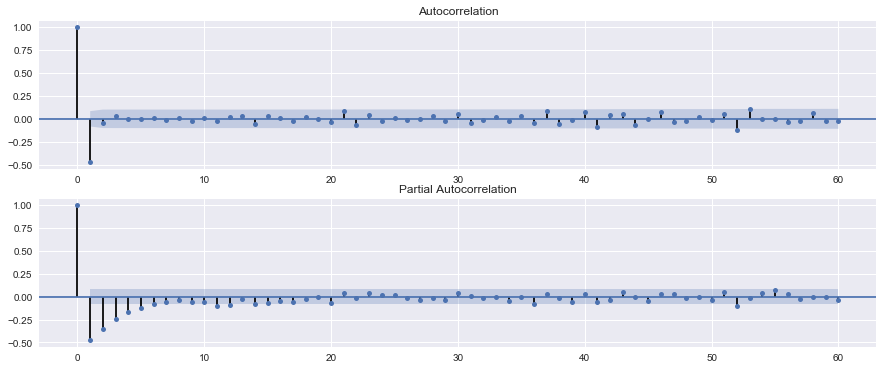

In [1686]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(twitter_ml2, lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(twitter_ml2, lags=60, ax=ax2)
plt.show()

In [1687]:
y1 = twitter_ml.values

model1 = sm.tsa.ARIMA(y1,order=(0,1,1))
results=model1.fit()

C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


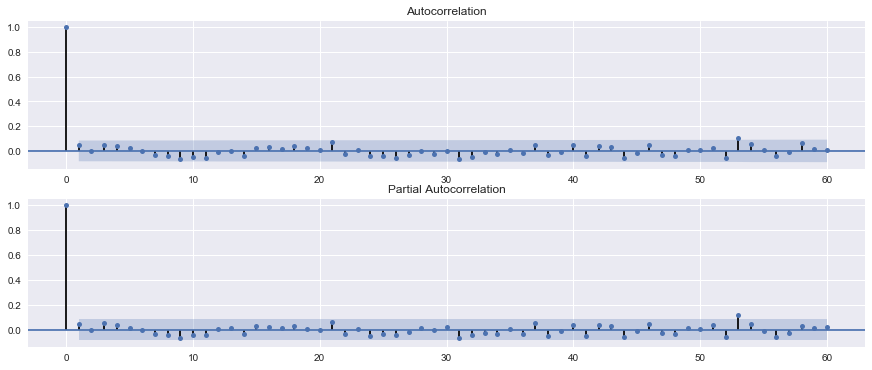

In [1688]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=60, ax=ax2)
plt.show()

In [1689]:
twitter_ml_preds = results.predict(start=547, end=576, typ='levels')

C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [1691]:
twitter_ml_preds = pd.DataFrame(twitter_ml_preds)

In [1692]:
days = pd.date_range(start = '2018-01-01', end = '2018-01-31', freq = 'D')
twitter_ml_preds.set_index(days, inplace=True)
twitter_ml_full = pd.concat([twitter_ml, twitter_ml_preds], axis=0)

In [1700]:
twitter_ml_full.columns = ['#ml']

In [1699]:
twitter_iot_full.columns = ['#iot']

In [1698]:
twitter_ai_full.columns = ['#ai']

In [1701]:
twitter_full = pd.concat([twitter_ai_full, twitter_iot_full,
                         twitter_ml_full], axis=1)

In [1702]:
twitter_full

,#ai,#iot,#ml
2016-06-01,11.000000,7.000000,7.000000
2016-06-02,8.000000,3.000000,7.000000
2016-06-03,7.000000,4.000000,7.000000
2016-06-04,6.000000,4.000000,4.000000
2016-06-05,6.000000,5.000000,7.000000
2016-06-06,7.000000,7.000000,7.000000
2016-06-07,7.000000,6.000000,4.000000
2016-06-08,8.000000,4.000000,5.000000
2016-06-09,8.000000,5.000000,7.000000
2016-06-10,10.000000,7.000000,7.000000


# Feature sets

ranges y vars:

- views - 294 days ( 2017-03-13 to 2017-12-31  )
- comments - 578 days (  2016-06-01 to 2017-12-31  )

feature sets:

- kantar
- brand innovate - 671 days  (  2016-04-01 to  2018-01-31 )
- brand tech - 671 days ( 2016-04-01 to  2018-01-31 )
- google trends - 805 days( 2015-12-14  to 2018-02-25 )

In [2127]:
twitter_test = features1.join(twitter_full, how='left')

In [2128]:
twitter_test.fillna(twitter_test.mean(), inplace=True)

,adobe artificial intelligence,amazon artificial intelligence,apple artificial intelligence,artificial intelligence,facebook artificial intelligence,google artificial intelligence,ibm artificial intelligence,intel artificial intelligence,microsoft artificial intelligence,nvidia artificial intelligence,oracle artificial intelligence,samsung artificial intelligence,sap artificial intelligence,twitter artificial intelligence,Amazon,Apple,Facebook,Google,HP (Hewlett Packard),Intel,Microsoft,Qualcomm,Samsung,#ai,#iot,#ml
2016-04-01,0,20,29,39,4,38,18,18,30,12,0,0,0,33,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-02,0,20,29,39,4,38,18,18,30,12,0,0,0,33,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-03,0,20,29,39,4,38,18,18,30,12,0,0,0,33,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-04,0,29,0,40,5,41,31,0,20,0,0,18,0,25,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-05,0,29,0,40,5,41,31,0,20,0,0,18,0,25,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-06,0,29,0,40,5,41,31,0,20,0,0,18,0,25,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-07,0,29,0,40,5,41,31,0,20,0,0,18,0,25,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-08,0,29,0,40,5,41,31,0,20,0,0,18,0,25,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-09,0,29,0,40,5,41,31,0,20,0,0,18,0,25,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494
2016-04-10,0,29,0,40,5,41,31,0,20,0,0,18,0,25,140,420,77,238,126,252,252,56,259,10.795229,7.365030,6.881494


limit_output extension: Maximum message size of 10000 exceeded with 44053 characters

In [2129]:
#features1 = pd.merge(google_trends, tech, left_index = True, right_index=True)
#features2 = pd.merge(features1, twitter_test, left_index=True, right_index=True)
features = pd.merge(twitter_test, innovate, left_index = True, right_index=True)


In [2130]:
features.isnull().sum()

adobe artificial intelligence        0
amazon artificial intelligence       0
apple artificial intelligence        0
artificial intelligence              0
facebook artificial intelligence     0
google artificial intelligence       0
ibm artificial intelligence          0
intel artificial intelligence        0
microsoft artificial intelligence    0
nvidia artificial intelligence       0
oracle artificial intelligence       0
samsung artificial intelligence      0
sap artificial intelligence          0
twitter artificial intelligence      0
 Amazon_x                            0
 Apple_x                             0
 Facebook_x                          0
 Google_x                            0
 HP (Hewlett Packard)_x              0
 Intel_x                             0
 Microsoft_x                         0
 Qualcomm_x                          0
 Samsung_x                           0
#ai                                  0
#iot                                 0
#ml                      

In [2131]:
features.tail()

,adobe artificial intelligence,amazon artificial intelligence,apple artificial intelligence,artificial intelligence,facebook artificial intelligence,google artificial intelligence,ibm artificial intelligence,intel artificial intelligence,microsoft artificial intelligence,nvidia artificial intelligence,oracle artificial intelligence,samsung artificial intelligence,sap artificial intelligence,twitter artificial intelligence,Amazon_x,Apple_x,Facebook_x,Google_x,HP (Hewlett Packard)_x,Intel_x,Microsoft_x,Qualcomm_x,Samsung_x,#ai,#iot,#ml,Amazon_y,Apple_y,Facebook_y,Google_y,HP (Hewlett Packard)_y,Intel_y,Microsoft_y,Qualcomm_y,Samsung_y
2018-01-27,50,55,68,87,5,82,48,46,29,31,47,31,27,14,182,406,77,231,133,231,252,70,231,11.394232,8.228974,8.228974,224,357,70,224,98,140,175,42,210
2018-01-28,50,55,68,87,5,82,48,46,29,31,47,31,27,14,182,406,77,231,133,231,252,70,231,11.401194,8.233525,8.233525,224,357,70,224,98,140,175,42,210
2018-01-29,25,43,51,78,7,59,43,15,32,84,0,31,0,29,182,406,77,231,133,231,252,70,231,11.408155,8.239451,8.239451,224,357,70,224,98,140,175,42,210
2018-01-30,25,43,51,78,7,59,43,15,32,84,0,31,0,29,182,406,77,231,133,231,252,70,231,11.415117,8.243544,8.243544,224,357,70,224,98,140,175,42,210
2018-01-31,25,43,51,78,7,59,43,15,32,84,0,31,0,29,182,406,77,231,133,231,252,70,231,11.422078,8.250233,8.250233,224,357,70,224,98,140,175,42,210


## TS analysis views

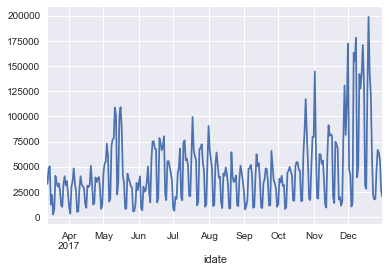

In [1154]:
views_all.plot()

In [1157]:
views_all.tail()

idate
2017-12-27    66688
2017-12-28    64131
2017-12-29    56838
2017-12-30    26164
2017-12-31    20037
dtype: int64

In [1155]:
dftest = smt.adfuller(views_all, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

print(dfoutput)

Test Statistic                  -2.975034
p-value                          0.037293
#Lags Used                      14.000000
Number of Observations Used    279.000000
dtype: float64


0.218960207856434

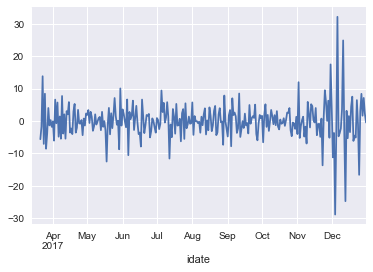

In [1596]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

views_log = boxcox1p(views_all, boxcox_normmax(views_all+1))

views_z = views_log.diff(7)
views_zz = views_z.diff(1)
views_zz.plot()

In [1598]:
views_zz.dropna(inplace=True)

In [1599]:
views_zz.isnull().sum()

0

In [1159]:
views_z.drop(views_z.index[0], inplace=True)

In [1464]:
dftest = smt.adfuller(views_zz, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

print(dfoutput)

Test Statistic                -6.765732e+00
p-value                        2.720278e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.690000e+02
dtype: float64


In [1465]:
views_zz.shape

(286,)

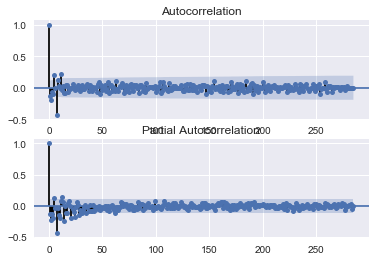

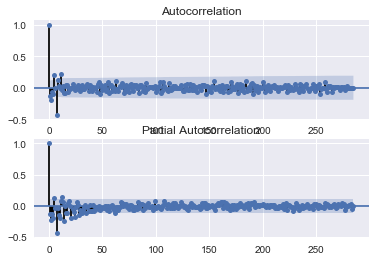

In [1466]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(views_zz, ax=plt.gca())
plt.subplot(212)
plot_pacf(views_zz, ax=plt.gca())

## TS analysis comments

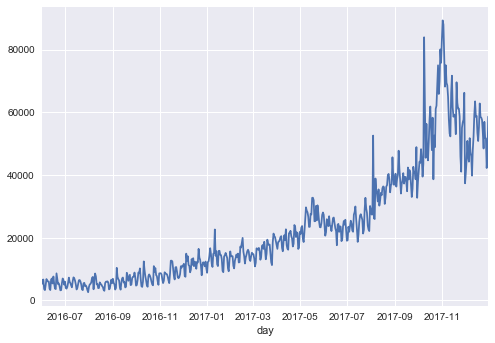

In [553]:
comments_all.plot()

In [554]:
dftest = smt.adfuller(comments_all, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

print(dfoutput)

Test Statistic                  -0.316047
p-value                          0.923201
#Lags Used                      13.000000
Number of Observations Used    564.000000
dtype: float64


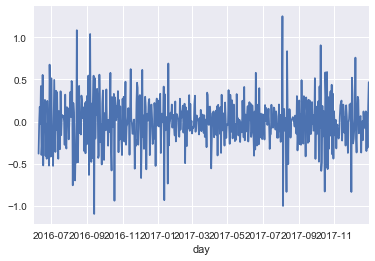

In [1600]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

comments_log = boxcox1p(comments_all, boxcox_normmax(comments_all+1))

comments_z = comments_log.diff(7)
comments_zz = comments_z.diff(1)
comments_zz.plot()

In [1601]:
comments_zz.dropna(inplace=True)

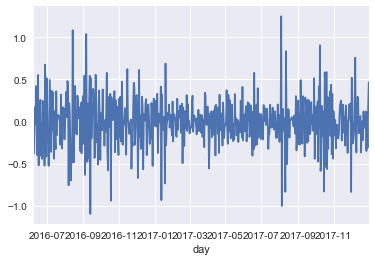

In [1602]:
comments_zz.plot()

In [1603]:
comments_zz.shape

(570,)

In [917]:
comments_z.drop(comments_z.index[0], inplace=True)

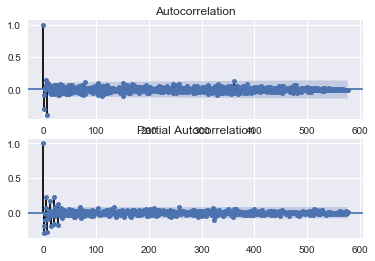

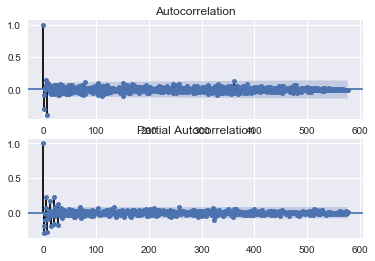

In [1582]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(comments_zz, ax=plt.gca())
plt.subplot(212)
plot_pacf(comments_zz, ax=plt.gca())

In [1583]:
dftest = smt.adfuller(comments_zz, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

print(dfoutput)

Test Statistic                -7.644245e+00
p-value                        1.860821e-11
#Lags Used                     1.900000e+01
Number of Observations Used    5.580000e+02
dtype: float64


In [1584]:
comments_zz.shape

(578,)

In [546]:
views_all.shape

(294,)

In [1604]:
features.shape

(546, 35)

### Features'

In [2045]:
v_index = views_zz.index.tolist()
c_index = comments_zz.index.tolist()

In [2076]:
c_index[-10:]

[datetime.date(2017, 12, 22),
 datetime.date(2017, 12, 23),
 datetime.date(2017, 12, 24),
 datetime.date(2017, 12, 25),
 datetime.date(2017, 12, 26),
 datetime.date(2017, 12, 27),
 datetime.date(2017, 12, 28),
 datetime.date(2017, 12, 29),
 datetime.date(2017, 12, 30),
 datetime.date(2017, 12, 31)]

In [2046]:
comments_zz.head()

day
2016-06-09   -0.379159
2016-06-10   -0.022713
2016-06-11    0.176062
2016-06-12   -0.025452
2016-06-13    0.421516
dtype: float64

In [2066]:
#Views
X_views = features.loc[features.index.isin(v_index),: ] 
#X_views_z = X_views.diff(7)
#X_views_z = X_views_z.dropna()

#Comments
X_comments = features.loc[features.index.isin(c_index),:]
#X_comments_z = X_comments.diff(7)
#X_comments_z = X_comments_z.dropna()

In [2075]:
features.tail

<bound method NDFrame.tail of             adobeartificialintelligence  amazonartificialintelligence  \
2016-04-01                            0                            20   
2016-04-02                            0                            20   
2016-04-03                            0                            20   
2016-04-04                            0                            29   
2016-04-05                            0                            29   
2016-04-06                            0                            29   
2016-04-07                            0                            29   
2016-04-08                            0                            29   
2016-04-09                            0                            29   
2016-04-10                            0                            29   
2016-04-11                            0                            44   
2016-04-12                            0                            44   
2016-04-13           

limit_output extension: Maximum message size of 10000 exceeded with 169913 characters

# Feature Engineering

In [2132]:
features.columns

Index(['adobe artificial intelligence', 'amazon artificial intelligence',
       'apple artificial intelligence', 'artificial intelligence',
       'facebook artificial intelligence', 'google artificial intelligence',
       'ibm artificial intelligence', 'intel artificial intelligence',
       'microsoft artificial intelligence', 'nvidia artificial intelligence',
       'oracle artificial intelligence', 'samsung artificial intelligence',
       'sap artificial intelligence', 'twitter artificial intelligence',
       ' Amazon_x', ' Apple_x', ' Facebook_x', ' Google_x',
       ' HP (Hewlett Packard)_x', ' Intel_x', ' Microsoft_x', ' Qualcomm_x',
       ' Samsung_x', '#ai', '#iot', '#ml', ' Amazon_y', ' Apple_y',
       ' Facebook_y', ' Google_y', ' HP (Hewlett Packard)_y', ' Intel_y',
       ' Microsoft_y', ' Qualcomm_y', ' Samsung_y'],
      dtype='object')

In [2133]:
#difference to intel scores

import re

    
#get col lists
arti_columns = []
tech_columns = []
innov_columns = []
for i in features.columns:
    if re.search('artificial', i):
        arti_columns.append(i)
        
    elif re.search('_x', i):
         tech_columns.append(i)
            
    elif re.search('_y', i):
        innov_columns.append(i)
            
#calculate differences
google_intel = features['intel artificial intelligence']
tech_intel = features[' Intel_x']
innov_intel = features[' Intel_y']

features2 = pd.DataFrame()

for i in arti_columns:
    features[i + '_diff'] = google_intel - features[i]
    
for i in tech_columns:
    features[i + '_diff'] = tech_intel - features[i]

for i in innov_columns:
    features[i + '_diff'] = innov_intel - features[i]
    
    
    
        

In [2134]:
#cloned features for ordering
innovate2 = innovate.copy()
tech2 = tech.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in innovate2.columns:
    innovate2[i] = innovate2[i].astype(str)
    innovate2[i] = le.fit_transform(innovate2[i])

for i in tech2.columns:
    tech2[i] = tech2[i].astype(str)
    tech2[i] = le.fit_transform(tech2[i])

innovate2.columns = (innovate2.columns + "-ordered-innovate")
tech2.columns = (tech2.columns + "-ordered-tech")
    
#concat
features = pd.concat([features, innovate2, tech2], axis=1)

In [2135]:
#composite scores
features.columns = features.columns.str.lower()
innovate.columns = innovate.columns.str.lower()
innovate.columns = innovate.columns.str.replace(" ", "")
features.columns = features.columns.str.replace(" ", "")
companies = pd.DataFrame()
companies2 = {}


for i in innovate.columns:
    temp_list = []
    intel_list = []
    for j in features.columns:
        if re.search(i + '-ordered', j):
            temp_list.append(j)
       
    #print(temp_list)
    companies2[i] = temp_list

companies2.pop("hp(hewlettpackard)")

[]

In [2136]:
#calculate new features
for i in companies2:
    features[i + '_combined'] = features[companies2[i][0]] + features[companies2[i][1]] 

In [2140]:
features.index[-5:]

DatetimeIndex(['2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30',
               '2018-01-31'],
              dtype='datetime64[ns]', freq='D')

### Add spending forecast futures

In [2141]:
spending = pd.read_csv('sum_intel.csv')
spending.set_index(keys=pd.DatetimeIndex(spending['week']), drop=True, inplace=True)
spending = spending['0']
spending = pd.DataFrame(spending)

In [2148]:
features = pd.merge(features, spending, left_index=True, right_index=True)

In [2142]:
days = pd.date_range(start = '2014-12-29', end = '2018-02-03', freq = 'D')

In [2143]:
spending['days'] = days

In [2144]:
spending.set_index('days', inplace=True)

In [2150]:
features.index[-5:]

DatetimeIndex(['2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30',
               '2018-01-31'],
              dtype='datetime64[ns]', freq=None)

In [2151]:
spending = pd.read_csv('sum_ge.csv')
spending.set_index(keys=pd.DatetimeIndex(spending['week']), drop=True, inplace=True)
spending = spending['0']
spending.rename(columns ={'0':'spending_ge'}, inplace=True)
spending_ge = pd.DataFrame(spending)



In [2155]:
features = pd.merge(features, spending_ge, left_index=True, right_index=True)

In [2161]:
features.index[-5:]

DatetimeIndex(['2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30',
               '2018-01-31'],
              dtype='datetime64[ns]', freq=None)

In [2157]:
spending = pd.read_csv('sum_nvidia.csv')
spending.set_index(keys=pd.DatetimeIndex(spending['week']), drop=True, inplace=True)
spending = spending['0']
spending.rename(columns ={'0':'spending_nvidia'}, inplace=True)
spending_nvidia = pd.DataFrame(spending)



In [2160]:
features = pd.merge(features, spending_nvidia, left_index=True, right_index=True)

In [2162]:
spending = pd.read_csv('sum_alph.csv')
spending.set_index(keys=pd.DatetimeIndex(spending['week']), drop=True, inplace=True)
spending = spending['0']
spending.rename(columns ={'0':'spending_alph'}, inplace=True)
spending_alph = pd.DataFrame(spending)



In [2171]:
days = pd.date_range(start = '2014-12-29', end = '2018-02-02', freq = 'D')

In [2173]:
#spending_alph.days = days
spending_alph.set_index('days', inplace=True)

In [2176]:
features = pd.merge(features, spending_alph, left_index=True, right_index=True)

In [2177]:
features.index[-31:]

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31'],
              dtype='datetime64[ns]', freq=None)

In [2178]:
spending = pd.read_csv('sum_sap.csv')
spending.set_index(keys=pd.DatetimeIndex(spending['week']), drop=True, inplace=True)
spending = spending['0']
spending.rename(columns ={'0':'spending_sap'}, inplace=True)
spending_sap = pd.DataFrame(spending)



In [2184]:
spending_sap['days'] = days
spending_sap.set_index('days', inplace=True)

In [2187]:
features = pd.merge(features, spending_sap, left_index=True, right_index=True)

In [2189]:
features.index[-31:]

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31'],
              dtype='datetime64[ns]', freq=None)

In [2190]:
names_cols = ['adobeartificialintelligence', 'amazonartificialintelligence',
       'appleartificialintelligence', 'artificialintelligence',
       'facebookartificialintelligence', 'googleartificialintelligence',
       'ibmartificialintelligence', 'intelartificialintelligence',
       'microsoftartificialintelligence', 'nvidiaartificialintelligence',
       'oracleartificialintelligence', 'samsungartificialintelligence',
       'sapartificialintelligence', 'twitterartificialintelligence',
       'amazon_x', 'apple_x', 'facebook_x', 'google_x', 'hp(hewlettpackard)_x',
       'intel_x', 'microsoft_x', 'qualcomm_x', 'samsung_x','#ai', '#iot',
       '#machinelearning','amazon_y',
       'apple_y', 'facebook_y', 'google_y', 'hp(hewlettpackard)_y', 'intel_y',
       'microsoft_y', 'qualcomm_y', 'samsung_y',
       'adobeartificialintelligence_diff', 'amazonartificialintelligence_diff',
       'appleartificialintelligence_diff', 'artificialintelligence_diff',
       'facebookartificialintelligence_diff',
       'googleartificialintelligence_diff', 'ibmartificialintelligence_diff',
       'intelartificialintelligence_diff',
       'microsoftartificialintelligence_diff',
       'nvidiaartificialintelligence_diff',
       'oracleartificialintelligence_diff',
       'samsungartificialintelligence_diff', 'sapartificialintelligence_diff',
       'twitterartificialintelligence_diff', 'amazon_x_diff', 'apple_x_diff',
       'facebook_x_diff', 'google_x_diff', 'hp(hewlettpackard)_x_diff',
       'intel_x_diff', 'microsoft_x_diff', 'qualcomm_x_diff', 'samsung_x_diff',
       'amazon_y_diff', 'apple_y_diff', 'facebook_y_diff', 'google_y_diff',
       'hp(hewlettpackard)_y_diff', 'intel_y_diff', 'microsoft_y_diff',
       'qualcomm_y_diff', 'samsung_y_diff', 'amazon-ordered-innovate',
       'apple-ordered-innovate', 'facebook-ordered-innovate',
       'google-ordered-innovate', 'hp(hewlettpackard)-ordered-innovate',
       'intel-ordered-innovate', 'microsoft-ordered-innovate',
       'qualcomm-ordered-innovate', 'samsung-ordered-innovate',
       'amazon-ordered-tech', 'apple-ordered-tech', 'facebook-ordered-tech',
       'google-ordered-tech', 'hp(hewlettpackard)-ordered-tech',
       'intel-ordered-tech', 'microsoft-ordered-tech', 'qualcomm-ordered-tech',
       'samsung-ordered-tech', 'amazon_combined', 'apple_combined',
       'facebook_combined', 'google_combined', 'intel_combined',
       'microsoft_combined', 'qualcomm_combined', 'samsung_combined', '0',
       '0_x', '0_y',
       'spending_alph', 'spending_sap']

In [2191]:
features.columns = names_cols

### spending derivitaves

In [2192]:
features['ge_spend_diff'] = features['0'] - features['0_x']
features['nvidia_spend_diff'] = features['0'] - features['0_y']
features['alpha_spend_diff'] = features['0'] - features['spending_alph']
features['sap_spend_diff'] = features['0'] - features['spending_sap']

In [2193]:
X_views.isnull().sum()

adobeartificialintelligence        0
amazonartificialintelligence       0
appleartificialintelligence        0
artificialintelligence             0
facebookartificialintelligence     0
googleartificialintelligence       0
ibmartificialintelligence          0
intelartificialintelligence        0
microsoftartificialintelligence    0
nvidiaartificialintelligence       0
oracleartificialintelligence       0
samsungartificialintelligence      0
sapartificialintelligence          0
twitterartificialintelligence      0
amazon_x                           0
apple_x                            0
facebook_x                         0
google_x                           0
hp(hewlettpackard)_x               0
intel_x                            0
microsoft_x                        0
qualcomm_x                         0
samsung_x                          0
#ai                                0
#iot                               0
#machinelearning                   0
amazon_y                           0
a

## Genetic Algos

In [1911]:
from gplearn.genetic import SymbolicTransformer

#here we set the possible ways of combining features for the algorithm
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min', 'sin', 'cos', 'tan']

#setting up the genetic algorithm
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=20,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=10,
                         random_state=42, n_jobs=3, metric = 'pearson')

In [2213]:
gp_fit_views = make_pipeline(RobustScaler(),
                             gp.fit(features.loc[views_zz.index], views_zz))

gp_fit_comments = make_pipeline(RobustScaler(),
                                gp.fit(features.loc[comments_zz.index],
                                       comments_zz))

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.3s finished


   0     7.76 0.02160534066061364       25 0.20164213893301186 0.7752001554550337     47.20s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.6s finished


   1     6.54 0.028013685597079643        3 0.18141216663294923 0.7425207977526215     42.05s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.6s finished


   2     6.72 0.03462216739194567        3 0.18499020963472984 0.673039417261295     38.44s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.6s finished


   3     6.84 0.04020642077746905       12 0.28133215074035983 0.1188668312624361     35.57s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.7s finished


   4     7.81 0.04730238364317315       17 0.2754432774400915 0.19011432947415838     33.71s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.6s finished


   5     8.91 0.05389744895762564       21 0.28339445303646943 0.10884481468751407     31.49s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.0s finished


   6    10.84 0.06470428658583617       13 0.3322381796159454 0.010126235919730256     29.78s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.9s finished


   7    13.27 0.07718770900947755       25 0.333431407755352 0.16720819670944537     27.82s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.1s finished


   8    19.42 0.10444773295120023       13 0.3752666147282069 0.32094726072449026     26.00s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.9s finished


   9    22.26 0.12153866868964912       30 0.44006029328044344 0.4522098577013834     23.71s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.9s finished


  10    24.03 0.13694398831725738       35 0.4290833448553912 0.7544558473393961     21.40s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.0s finished


  11    26.26 0.1536446411207514       24 0.45428781491242753 0.07421456200825036     19.13s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.0s finished


  12    28.19 0.17115658238429546       20 0.504572457229478 0.18484707043630857     16.91s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.2s finished


  13    33.05 0.1968463078424744       76 0.4910861838093704 0.40231193474036125     14.65s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.1s finished


  14    35.51 0.21771145553816365       81 0.4778967378128553 0.41802290500850553     12.31s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.2s finished


  15    40.52 0.22656849294673875       91 0.5102268949588483 0.06390971877261288      9.96s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.3s finished


  16    51.71 0.24872419340046426       82 0.5212773241134736 0.3173326190528762      7.57s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.1s finished


  17     60.5 0.2716789497219509       85 0.5051823710233624 0.1457368157333259      5.18s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.1s finished


  18    61.61 0.2721824231718564       59 0.5152323459088995 0.0917945945454997      2.65s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.0s finished


  19    61.32 0.26893076901279844       74 0.5097883261863462 0.1414777397832849      0.00s
    |    Population Average   |             Best Individual              |

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.7s finished



---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     7.76 0.014435764680705617        3 0.075304024175078 0.4182230884705922     42.03s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.2s finished


   1     6.38 0.02085694064937948        4 0.09808955434455698 0.11691401456680223     44.84s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.2s finished


   2      6.3 0.031678967566966115        5 0.12976651137324954 0.3426305843397878     44.34s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.8s finished


   3     6.83 0.04348698913910296       25 0.13837101102838048 0.07734624199225296     41.02s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.2s finished


   4     7.83 0.05429923341003059       25 0.15111086640411303 0.1358166031257377     38.94s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.4s finished


   5     9.43 0.06050325346524376       25 0.147875757981144 0.010723169365826107     37.25s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.4s finished


   6    14.41 0.057675796950644884       25 0.17529407993615576 0.06505172679308163     35.30s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.7s finished


   7    19.14 0.05826944127377135       31 0.20404115706119613 0.011527127000494039     33.38s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.7s finished


   8    22.73 0.06390813340441037       33 0.20558671709735532 0.0646035466480483     31.31s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.5s finished


   9    25.47 0.07358078173714097       35 0.2111228376511798 0.09719254388978625     28.73s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.8s finished


  10    29.62 0.08545750479007636       33 0.23607241379348065 0.023323950415289212     26.35s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.7s finished


  11    32.28 0.09408069231924168       55 0.23506537120663137 0.05515808255459599     24.32s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.8s finished


  12    31.09 0.08885054916332227       48 0.23670769741796896 0.02073845374790208     21.48s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.8s finished


  13    32.14 0.09330861149161225       55 0.2427040275729653 0.22975595846550623     18.61s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.8s finished


  14    34.67 0.09702452035003756       47 0.24977295508558037 0.06255640713705253     15.64s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.8s finished


  15    38.29 0.098405997762113       56 0.24900330796208986 0.030350496555297216     12.59s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.8s finished


  16     41.3 0.10562788892357144       59 0.24630830952832153 0.23226973360393313      9.50s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.0s finished


  17    47.59 0.11978959712333406       63 0.2603916832186102 0.026870495494770115      6.38s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.1s finished


  18    53.08 0.12592894464170895       74 0.26598671029586096 0.12288006263218315      3.22s
  19    53.92 0.12739354150569748       74 0.276065273540649 0.10534293107167668      0.00s


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.2s finished


In [2230]:
gp_features_views = gp_fit_views.steps[1][1].transform(features)

gp_features_comments = gp_fit_comments.steps[1][1].transform(features)

In [2231]:
gp_features_views = pd.DataFrame(gp_features_views)

gp_features_comments = pd.DataFrame(gp_features_comments)

In [2232]:
gp_features_views.columns = ['gp_set_' + str(col) for col in gp_features_views.columns]
gp_features_views.index = features.index

gp_features_comments.columns = ['gp_set_' + str(col) for col in gp_features_comments.columns]
gp_features_comments.index = features.index

In [2233]:
full_features = pd.concat([features, gp_features_views], axis=1)

#X_comments = pd.concat([X_comments, gp_features_comments], axis=1)

In [2072]:
print(X_views.shape, X_comments.shape)

(286, 122) (570, 122)


In [2234]:
gp_features_views.shape

(671, 20)

In [2073]:
X_views.columns[-30:]

Index(['samsung_combined', '0', '0_x', '0_y', 'spending_alph', 'spending_sap',
       'ge_spend_diff', 'nvidia_spend_diff', 'alpha_spend_diff',
       'sap_spend_diff', 'gp_set_0', 'gp_set_1', 'gp_set_2', 'gp_set_3',
       'gp_set_4', 'gp_set_5', 'gp_set_6', 'gp_set_7', 'gp_set_8', 'gp_set_9',
       'gp_set_10', 'gp_set_11', 'gp_set_12', 'gp_set_13', 'gp_set_14',
       'gp_set_15', 'gp_set_16', 'gp_set_17', 'gp_set_18', 'gp_set_19'],
      dtype='object')

# Outliers

In [1923]:
from sklearn.neighbors import LocalOutlierFactor

detector = LocalOutlierFactor(n_neighbors=20, contamination=0.001, n_jobs=3)
predictions_views = detector.fit_predict(X_views)
predictions_comments = detector.fit_predict(X_comments)

In [1924]:
outliers_views = []
for index, value in enumerate(predictions_views):
     if value == -1:
        outliers_views.append(index)
        
outliers_views

[112]

In [1925]:
outliers_comments = []
for index, value in enumerate(predictions_comments):
     if value == -1:
        outliers_comments.append(index)
        
outliers_comments

[87]

In [1928]:
X_views.iloc[outliers_views] = np.nan
X_comments.iloc[outliers_comments] = np.nan

views_zz.iloc[outliers_views] = np.nan
comments_zz.iloc[outliers_comments] = np.nan

X_views.interpolate(method='linear', inplace=True)
X_comments.interpolate(method='linear', inplace=True)

views_zz.interpolate(method='linear', inplace=True)
comments_zz.interpolate(method='linear', inplace=True)

In [2019]:
features.samsung_y.tail(n=100)

2017-10-16    217
2017-10-17    217
2017-10-18    217
2017-10-19    217
2017-10-20    217
2017-10-21    217
2017-10-22    217
2017-10-23    217
2017-10-24    217
2017-10-25    217
2017-10-26    217
2017-10-27    217
2017-10-28    217
2017-10-29    217
2017-10-30    217
2017-10-31    217
2017-11-01    196
2017-11-02    196
2017-11-03    196
2017-11-04    196
2017-11-05    196
2017-11-06    196
2017-11-07    196
2017-11-08    196
2017-11-09    196
2017-11-10    196
2017-11-11    196
2017-11-12    196
2017-11-13    196
2017-11-14    196
             ... 
2017-12-25    210
2017-12-26    210
2017-12-27    210
2017-12-28    210
2017-12-29    210
2017-12-30    210
2017-12-31    210
2018-01-01    210
2018-01-13    210
2018-01-14    210
2018-01-15    210
2018-01-16    210
2018-01-17    210
2018-01-18    210
2018-01-19    210
2018-01-20    210
2018-01-21    210
2018-01-22    210
2018-01-23    210
2018-01-24    210
2018-01-25    210
2018-01-26    210
2018-01-27    210
2018-01-28    210
2018-01-28

In [2010]:
days = pd.date_range(start = '2016-04-01', end = '2018-01-31', freq = 'D')


In [2012]:
features.set_index(days, inplace=True)

ValueError: Length mismatch: Expected axis has 663 elements, new values have 671 elements

# Baseline model

In [1960]:
validation_views = views_zz[281:]
views = views_zz[:281]
print(validation_views)

validation_comments = comments_zz[565:]
comments = comments_zz[:565]
print(validation_comments)

validation_views_X = X_views[281:]
X_v = X_views[:281]

validation_comments_X = X_comments[565:]
X_c = X_comments[:565]

idate
2017-12-27    8.401133
2017-12-28    1.643217
2017-12-29    7.133999
2017-12-30    2.290965
2017-12-31   -0.447013
dtype: float64
day
2017-12-27   -0.348209
2017-12-28    0.102703
2017-12-29   -0.308403
2017-12-30    0.183929
2017-12-31    0.467560
dtype: float64


In [2266]:
X_view_log = full_features.loc[views_log.index]
X_comments_log = full_features.loc[comments_log.index]

In [2235]:
testing_views = full_features.loc[full_features.index >= '2018-01-01']
testing_comments = full_features.loc[full_features.index >= '2018-01-01']

In [2236]:
testing_views.shape

(31, 122)

## baseline

In [1933]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import TimeSeriesSplit

#Build our model method
lm = LinearRegression()

#Build our cross validation method
kfolds = KFold(n_splits=10, shuffle=True, random_state=23)
tsfolds = TimeSeriesSplit(n_splits=5)

#build our model scoring function
def cv_rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = tsfolds, verbose = 1, n_jobs=3))
    return(rmse)

#MAPE scoring function
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sum(np.abs((y_true - y_pred) / y_true)) * (100/len(y_pred))

## Views baseline

In [1934]:
benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X_v, y=views_zz)
cv_rmse(benchmark_model, X_v, views_zz).mean()

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    7.1s finished


69.96071184239064

- baseline: 31039 rmse
- diffs: 30810 rmse 
- baseline + diffs: 31104 
- baseline + target differenced: 7.899
- baseline + diffs + target differenced + gens: 11.1783

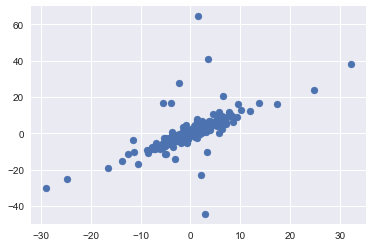

In [1935]:
preds = cross_val_predict(benchmark_model, X_v, views_zz, cv=kfolds)
resids = views_zz - preds

plt.scatter(views_zz, resids)

In [1936]:
coeffs = pd.DataFrame(list(zip(X_v.columns, benchmark_model.steps[1][1].coef_)), 
                      columns=['Predictors', 'Coefficients'])

coeffs.sort_values(by='Coefficients', ascending=False)

,Predictors,Coefficients
35,adobeartificialintelligence_diff,5.742666e+10
0,adobeartificialintelligence,4.758209e+10
103,gp_set_1,5.526056e+00
106,gp_set_4,7.522380e-01
98,ge_spend_diff,6.503894e-01
104,gp_set_2,5.008926e-01
97,spending_sap,4.893456e-01
113,gp_set_11,3.777337e-01
24,#iot,2.832260e-01
100,alpha_spend_diff,2.380989e-01


In [1963]:
r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

alphas_alt = [790, 800, 810]

ridge_model_views = make_pipeline(RobustScaler(),
                                  RidgeCV(alphas = alphas_alt,
                            cv=tsfolds)).fit(X_v, views)

cv_rmse(ridge_model_views, X_v, views).mean()

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.2s finished


6.473994680803218

In [1938]:
ridge_model_views.steps[1][1].alpha_

810

- baseline: 7.589
- with genetic features: 7.17
- with gen features + spending + combined: 7.885
- w/ gen features + outliers remove: 7.4487
- + new spending vars: 7.7053
- + new spending + derivs: 7.3885
- everything + both diffed: 7.4799

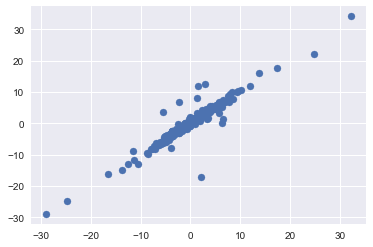

In [1964]:
preds = cross_val_predict(ridge_model_views, X_v, views, cv=kfolds)
resids = views - preds

plt.scatter(views, resids)

In [1965]:
coeffs = pd.DataFrame(list(zip(X_v.columns, ridge_model_views.steps[1][1].coef_)), 
                      columns=['Predictors', 'Coefficients'])

coeffs.sort_values(by='Coefficients', ascending=False)

,Predictors,Coefficients
106,gp_set_4,0.066608
109,gp_set_7,0.061379
12,sapartificialintelligence,0.054817
113,gp_set_11,0.054226
24,#iot,0.051202
120,gp_set_18,0.039893
97,spending_sap,0.037617
77,apple-ordered-tech,0.036766
15,apple_x,0.036766
71,hp(hewlettpackard)-ordered-innovate,0.031655


In [1942]:
#elasticnet
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.01, 0.05, 0.1, 0.15, 2]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv_views = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=tsfolds, l1_ratio=e_l1ratio))

elastic_views= elastic_cv_views.fit(X_v, views)

cv_rmse(elastic_views, X_v, views).mean()

KeyboardInterrupt: 

### SVR non-lin

In [1258]:
from sklearn.model_selection import GridSearchCV

svr = svm.SVR(kernel = 'rbf', verbose=True)

params = {'C':[1e0, 1e1, 1e2, 1e3],
         'gamma': np.logspace(-2, 2, 5)}

svr_grid = GridSearchCV(estimator= svr, param_grid = params, cv=tsfolds, 
                       scoring = 'neg_mean_squared_error', verbose = 10, n_jobs=3)

svr_grid.fit(X_v, views)
print(svr_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    4.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.2s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Batch computation too fast (0.1921s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done  27 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0469s.) Setting batch_size=16.
[Parallel(n_jobs=3)]: Done  84 out of 100 | elapsed:    4.7s remaining:    0.8s


[LibSVM]{'C': 1.0, 'gamma': 0.01}


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    4.9s finished


In [1966]:
from sklearn import svm
from sklearn.preprocessing import MaxAbsScaler

svr_opt = svm.SVR(kernel = 'rbf', C = 1, gamma = 0.01, verbose=True)

svr_fit_v = svr_opt.fit(X_v, views)

cv_rmse(svr_fit_v, X_v, views).mean()

[LibSVM]

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.5s finished


5.112125585195123

In [1262]:
from sklearn.kernel_ridge import KernelRidge

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), 
                  cv=tsfolds,verbose=1,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

kr.fit(X_v, views)
print(kr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'alpha': 1.0, 'gamma': 0.01}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [1967]:
kr_opt = KernelRidge(kernel = 'rbf', gamma = 0.01, alpha=1.0)

kr_fit_v = kr_opt.fit(X_v, views)

cv_rmse(kr_fit_v, X_v, views).mean()

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.2s finished


5.132046492681037

## Comments baseline

In [1968]:
benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X_c, y=comments)

cv_rmse(benchmark_model, X_c, comments).mean()

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.2s finished


0.7868965423313958

In [1971]:
r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

alphas_alt = [100, 500, 1000]

ridge_model_comments = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=tsfolds)).fit(X_comments, comments_zz)

cv_rmse(ridge_model_comments, X_comments, comments_zz).mean()

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.3s finished


0.30481236863115285

In [1946]:
ridge_model_comments.steps[1][1].alpha_

1000

- gen + combined + spend: 0.37515
- gen + combined + spend + outliers rem: 0.330187
- + extra spending vars: 0.358441
- + spend vars + derivs: 0.3364
- timeseries cross-val: 0.28
- ts cross-vall full: 0.268

In [1972]:
coeffs = pd.DataFrame(list(zip(X_c.columns, ridge_model_comments.steps[1][1].coef_)), 
                      columns=['Predictors', 'Coefficients'])

coeffs.sort_values(by='Coefficients', ascending=False)

,Predictors,Coefficients
24,#iot,0.005076
12,sapartificialintelligence,0.002576
9,nvidiaartificialintelligence,0.002384
25,#machinelearning,0.002377
103,gp_set_1,0.002352
102,gp_set_0,0.002220
104,gp_set_2,0.002170
116,gp_set_14,0.002074
100,alpha_spend_diff,0.001965
112,gp_set_10,0.001573


In [1993]:
#elasticnet
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.05, 0.1, 0.3, 1, 3, ]
e_l1ratio = [0.8, 0.9,  1]

elastic_cv_comments = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=tsfolds, l1_ratio=e_l1ratio))

elastic_comments = elastic_cv_comments.fit(X_comments, comments_zz)

cv_rmse(elastic_comments, X_comments, comments_zz).mean()

KeyboardInterrupt: 

In [1142]:
elastic_cv_comments.steps[1][1].alpha_

0.05

In [1265]:
from sklearn.model_selection import GridSearchCV

svr = svm.SVR(kernel = 'rbf', verbose=True)

params = {'C':[1e0, 1e1, 1e2, 1e3],
         'gamma': np.logspace(-2, 2, 5)}

svr_grid = GridSearchCV(estimator= svr, param_grid = params, cv=tsfolds, 
                       scoring = 'neg_mean_squared_error',
                        verbose = 10, n_jobs=3)

svr_grid.fit(X_c, comments)
print(svr_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Batch computation too fast (0.1987s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=3)]: Batch computation too fast (0.1058s.) Setting batch_size=6.
[Parallel(n_jobs=3)]: Done  46 tasks      | elapsed:    5.0s


[LibSVM]{'C': 1.0, 'gamma': 0.01}


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.8s finished


In [1992]:
from sklearn import svm
from sklearn.preprocessing import MaxAbsScaler

svr_opt = svm.SVR(kernel = 'rbf', C = 1, gamma = 0.01, verbose=True)

svr_fit_c = svr_opt.fit(X_c, comments)

cv_rmse(svr_fit_c, X_comments, comments_zz).mean()

[LibSVM]

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.2s finished


0.26893203710407726

In [1267]:
from sklearn.kernel_ridge import KernelRidge

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), 
                  cv=tsfolds,verbose=1,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

kr.fit(X_c, comments)
print(kr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'alpha': 1.0, 'gamma': 0.01}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [1991]:
kr_opt = KernelRidge(kernel = 'rbf', gamma = 0.01, alpha=1.0)

kr_fit_c = kr_opt.fit(X_comments, comments_zz)

cv_rmse(kr_fit_c, X_comments, comments_zz).mean()

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.4s finished


0.2691151983534734

In [1999]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

#setup models
ridge = make_pipeline(RobustScaler(), 
                      RidgeCV(alphas = alphas_alt, cv=kfolds))

kr_opt = KernelRidge(kernel = 'rbf', gamma = 0.01, alpha=1.0)

svr_opt = svm.SVR(kernel = 'rbf', C = 1, gamma = 0.01, verbose=True)

xgb_opt = XGBRegressor(learning_rate =0.01, n_estimators=3000, 
                        max_depth=5, min_child_weight=20,
                        gamma=0.001,subsample=1.0,
                        colsample_bytree=1, 
                        alpha=0,
                        objective= 'reg:linear',
                        seed=27, 
                        silent = False, verbose=10,nthread=4)




#stack
stack_gen = StackingCVRegressor(regressors=(ridge, kr_opt, svr_opt, 
                                            xgb_opt), 
                               meta_regressor=xgb_opt,
                               use_features_in_secondary=True)

#prepare dataframes
stackX = np.array(X_views)
stacky = np.array(views_zz)

In [1996]:
#scoring 

print("cross validated scores")

for model, label in zip([ridge, kr_opt, svr_opt, xgb_opt, stack_gen],
                     ['RidgeCV', 'KernelRidge', 'SVR', 'xgboost',
                      'StackingCVRegressor']):
    
    SG_scores = cross_val_score(model, stackX, stacky, cv=tsfolds,
                               scoring='neg_mean_squared_error')
    print("RMSE", np.sqrt(-SG_scores.mean()), "SD", SG_scores.std(), label)

cross validated scores
RMSE 6.63688784471662 SD 29.060288046548173 RidgeCV
RMSE 5.6895928658378665 SD 35.0941026100241 KernelRidge
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]RMSE 5.678622960274093 SD 34.824695344509514 SVR
RMSE 6.079066237114224 SD 33.94925299415276 xgboost
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]RMSE 6.426907780155447 SD 31.25197732857506 StackingCVRegressor


In [2000]:
stack_gen_model_v = stack_gen.fit(stackX, stacky)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [1997]:
#scoring- comments



print("cross validated scores")

for model, label in zip([ridge, kr_opt, svr_opt, xgb_opt, stack_gen],
                     ['RidgeCV', 'KernelRidge', 'SVR', 'xgboost',
                      'StackingCVRegressor']):
    
    SG_scores = cross_val_score(model, stackX, stacky, cv=tsfolds,
                               scoring='neg_mean_squared_error')
    print("RMSE", np.sqrt(-SG_scores.mean()), "SD", SG_scores.std(), label)

cross validated scores
RMSE 0.4086762576129757 SD 0.1590219073892717 RidgeCV
RMSE 0.2731206309078182 SD 0.025020441638209174 KernelRidge
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]RMSE 0.27297729535991 SD 0.02513166540223933 SVR
RMSE 0.30474798427623323 SD 0.030737969209153063 xgboost
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]RMSE 0.3281719733468458 SD 0.059548910483844586 StackingCVRegressor


In [1998]:
stackX = np.array(X_comments)
stacky = np.array(comments_zz)

stack_gen_model = stack_gen.fit(stackX, stacky)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

# STRONG models
## XGBoost

In [2305]:
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline
import xgboost as xgb
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)
    params['eta'] = 0.1
    params['silent'] = False
    params['eval_metric'] ='rmse'
    params['verbose_eval'] = True
    params['objective'] ='reg:linear'
    params['folds'] = kfolds
    
    cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds,
             seed=42,
             callbacks=[xgb.callback.early_stop(50)])

    return -cv_result['test-rmse-mean'].values[-1]

Initialization

### views

In [1004]:
print('preparing data')
xgtrain = xgb.DMatrix(X_v, label=views)
params = {}
print('setting up optimizer')
num_rounds = 10
random_state = 42

XGB_BO = BayesianOptimization(xgb_evaluate, {'max_depth': (5, 15),
                                             'gamma': (0.001, 10.0),
                                             'min_child_weight': (1, 20),
                                             'subsample': (0.5, 1.0),
                                             'colsample_bytree' :(0.1, 1.0),
                                             'alpha' : (0,10),
                                             'lambda': (0,10)
                                    })

XGB_BO.maximize(init_points = 10, n_iter = 50)

preparing data
setting up optimizer
Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
    1 | 00m00s |  -16.32028 |    0.8968 |             0.8650 |    6.8822 |      7.0381 |             1.1871 |      0.6432 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
    2 | 00m00s |  -16.19719 |    4.8905 |             0.9019 |    5.6991 |      7.2671 |             5.3597 |      0.8896 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
    3 | 00m00s |  -16

C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00016463]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   17 | 00m09s |  -16.03073 |    0.0000 |             1.0000 |   10.0000 |      5.0000 |            20.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   18 | 00m08s |  -16.13334 |   10.0000 |             1.0000 |    0.0010 |     15.0000 |            11.4973 |      1.0000 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   19 | 00m08s |  -16.10412 |    5.3380 |             1.0000 |    0.0010 |      5.0000 |            10.7349 |      1.0000 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   20 | 00m09s |  -16.15559 |    0.0000 |            

C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.29258977e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   21 | 00m10s |  -16.02666 |    0.0000 |             0.1000 |    0.0010 |     15.0000 |            20.0000 |      1.0000 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00016913]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   22 | 00m08s |  -16.20375 |    9.8937 |             0.1001 |    0.0530 |      5.1327 |             8.9880 |      0.7934 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   23 | 00m09s |  -16.13119 |   10.0000 |             1.0000 |   10.0000 |     15.0000 |             1.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   24 | 00m09s |  -16.12373 |   10.0000 |             1.0000 |   10.0000 |     15.0000 |            20.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   25 | 00m09s |  -16.06277 |    0.0000 |            

C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([5.3527041e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   26 | 00m08s |  -16.13119 |   10.0000 |             1.0000 |   10.0000 |      5.0000 |             1.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   27 | 00m08s |  -16.13334 |   10.0000 |             1.0000 |   10.0000 |     15.0000 |            11.7490 |      1.0000 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   28 | 00m08s |  -16.06184 |    0.0000 |             1.0000 |    0.0010 |     15.0000 |            12.9091 |      1.0000 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   29 | 00m10s |  -16.18262 |    0.0000 |            

limit_output extension: Maximum message size of 10000 exceeded with 10040 characters

In [1005]:
print('-'*50)
print('Final Results')
print('Maximum XGBOOST value: %f' % XGB_BO.res['max']['max_val'])
print('Best XGBOOST parameters: ', XGB_BO.res['max']['max_params'])

--------------------------------------------------
Final Results
Maximum XGBOOST value: -16.026663
Best XGBOOST parameters:  {'max_depth': 5.0, 'gamma': 0.001, 'min_child_weight': 20.0, 'subsample': 1.0, 'colsample_bytree': 1.0, 'alpha': 0.0}


In [1990]:
xgb_opt = XGBRegressor(learning_rate =0.01, n_estimators=3000, 
                        max_depth=5, min_child_weight=20,
                        gamma=0.001,subsample=1.0,
                        colsample_bytree=1, 
                        alpha=0,
                        objective= 'reg:linear',
                        seed=27, 
                        silent = False, verbose=10,nthread=4)

xgb_opt_views = xgb_opt.fit(X_views,views_zz)

cv_rmse(xgb_opt_views, X_views.as_matrix(), views_zz.as_matrix()).mean()

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   22.0s finished


5.607445447386882

- alpha 0 - 7.699
- alpha 800 - 7.680
- ts cross-val: 8.087
- final: 5.739
- fullset: 5.607

### comments

In [1006]:
print('preparing data')
xgtrain = xgb.DMatrix(X_c, label=comments)
params = {}
print('setting up optimizer')
num_rounds = 10
random_state = 42

XGB_BO_comments = BayesianOptimization(xgb_evaluate, {'max_depth': (5, 15),
                                             'gamma': (0.001, 10.0),
                                             'min_child_weight': (1, 20),
                                             'subsample': (0.5, 1.0),
                                             'colsample_bytree' :(0.1, 1.0),
                                             'alpha' : (0,10),
                                             'lambda': (0,10)
                                    })

XGB_BO_comments.maximize(init_points = 10, n_iter = 50)

preparing data
setting up optimizer
Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
    1 | 00m00s |   -0.35373 |    7.1299 |             0.5487 |    0.6242 |      5.0649 |             7.6006 |      0.7065 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
    2 | 00m00s |   -0.35242 |    4.3681 |             0.1776 |    8.3557 |     10.8675 |             6.5471 |      0.5357 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
    3 | 00m00s |   -0

C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   11 | 00m12s |   -0.34538 |    0.8846 |             0.9906 |    9.5119 |     14.8437 |            19.4673 |      0.9124 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.84147775e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   12 | 00m12s |   -0.34456 |    0.0948 |             0.9636 |    1.0779 |     12.9882 |             1.1216 |      0.9817 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   13 | 00m11s |   -0.34420 |    0.0010 |             0.8528 |    9.4913 |     12.2285 |             8.6283 |      0.9936 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00011818]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   14 | 00m11s |   -0.34431 |    0.1391 |             0.9968 |    5.3509 |     12.4688 |            14.1685 |      0.9999 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00057626]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   15 | 00m11s |   -0.34465 |    0.2726 |             0.8247 |    9.8634 |      5.6137 |            19.0061 |      0.9356 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   16 | 00m12s |   -0.34506 |    0.3735 |             0.8684 |    0.6858 |     14.9834 |             5.2329 |      0.9832 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   17 | 00m12s |   -0.34436 |    0.1013 |             0.7266 |    7.9535 |      5.4083 |             1.0250 |      0.9638 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.80153472e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   18 | 00m12s |   -0.34461 |    0.1319 |             0.6101 |    6.4619 |     14.8274 |             1.0560 |      0.9819 | 


C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00045592]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\Laurens\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   19 | 00m13s |   -0.34455 |    0.3151 |             0.9313 |    9.5383 |      7.9545 |             1.3150 |      0.9605 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   20 | 00m15s |   -0.36033 |    0.0760 |             0.9992 |    0.0964 |     14.0179 |            19.1380 |      0.9780 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
   21 | 00m17s |   -0.37110 |    9.5320 |             0.4838 |    0.0748 |     14.8755 |             1.1494 |      0.5248 | 
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train unti

limit_output extension: Maximum message size of 10000 exceeded with 10042 characters

In [1007]:
print('-'*50)
print('Final Results')
print('Maximum XGBOOST value: %f' % XGB_BO_comments.res['max']['max_val'])
print('Best XGBOOST parameters: ', XGB_BO_comments.res['max']['max_params'])

--------------------------------------------------
Final Results
Maximum XGBOOST value: -0.344197
Best XGBOOST parameters:  {'max_depth': 12.228469457749927, 'gamma': 9.491254884589363, 'min_child_weight': 8.628306463716001, 'subsample': 0.9936254634277377, 'colsample_bytree': 0.8527885029035658, 'alpha': 0.0009507466952907162}


In [1989]:
xgb_opt = XGBRegressor(learning_rate =0.01, n_estimators=3000, 
                        max_depth= 12, 
                        min_child_weight=8.628306463716001,
                        gamma=9.491254884589363,
                        subsample=0.9936254634277377,
                        colsample_bytree= 0.8527885029035658, 
                        alpha=0.0009507466952907162,
                        objective= 'reg:linear',
                        seed=27, 
                        silent = False,verbose=10,nthread=4)

xgb_opt_comments = xgb_opt.fit(X_comments, comments_zz)

cv_rmse(xgb_opt_comments, X_comments, comments_zz).mean()

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   43.4s finished


0.26887742499997214

normal corss_val: 0.29
ts cross_val: 0.26
ts cross + diffed: 0.2674
finaL: 26.84
fullset: 0.2688

# TS residuals

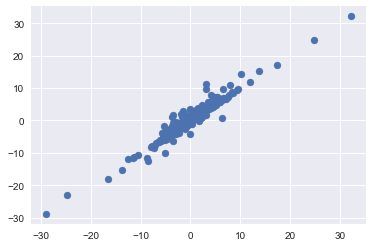

In [1976]:
preds = cross_val_predict(kr_fit_v, X_v, views, cv=kfolds)
resids = views - preds

plt.scatter(views, resids)

In [2270]:
views_log.head()

idate
2017-03-13    39.980330
2017-03-14    43.751069
2017-03-15    44.330132
2017-03-16    31.440238
2017-03-17    36.220766
dtype: float64

In [2284]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

sarimax = SARIMAX(endog=views_log, exog=X_view_log, order=(1,1,0), 
                 seasonal_order=(1,1,0,7), trend='ct')

results=sarimax.fit()


C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [2285]:
resids = SARIMAXResults.resid(results)

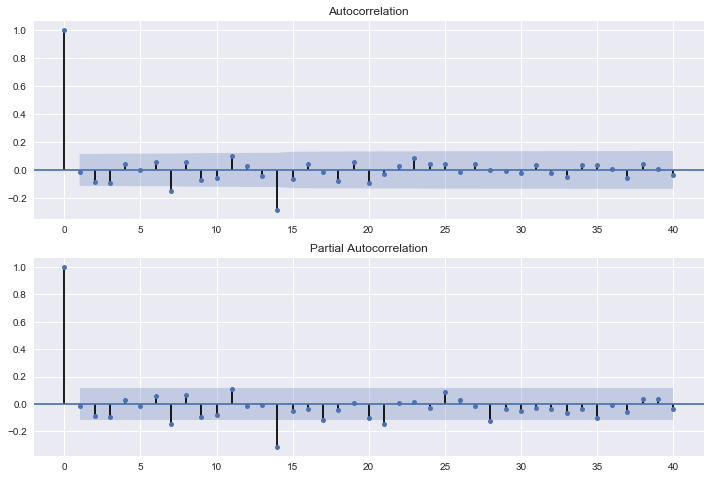

In [2286]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resids, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resids, lags=40, ax=ax2)
plt.show()

In [2293]:
pred = results.predict(start="2017-12-31",
                               end="2018-01-31",
                               exog=testing_views.values.astype('float64'),
                               dynamic=False)

In [2310]:
pred[3] = 68.5

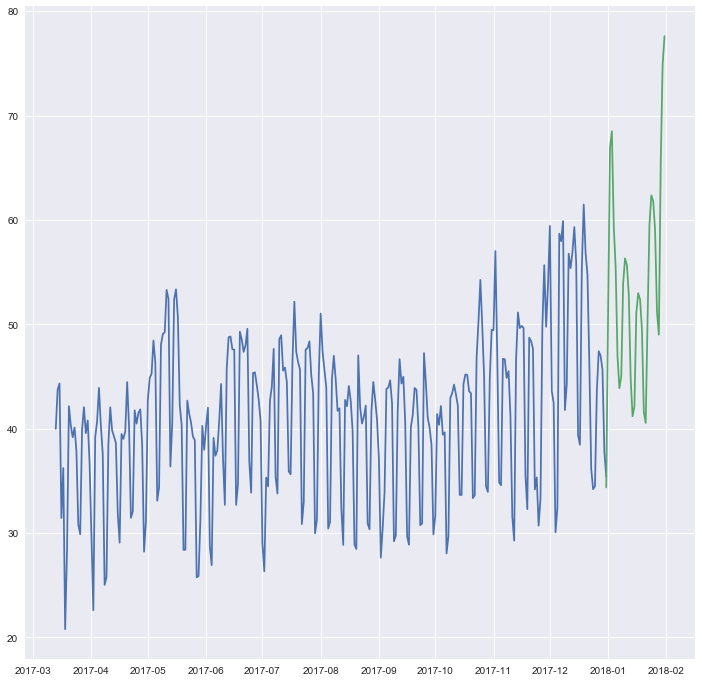

In [2311]:
plt.figure(figsize=(12,12))

plt.plot(views_log)
plt.plot(pred)

In [2368]:
from scipy.special import inv_boxcox
lambda_bx =  boxcox_normmax(views_all+1)

inverted_views = inv_boxcox(views_log, lambda_bx)
inverted_views_preds = inv_boxcox(pred, lambda_bx)

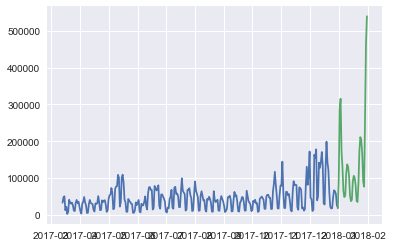

In [2410]:
plt.plot(inverted_views)
plt.plot(inverted_views_preds)

## comments

In [2395]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

sarimax = SARIMAX(endog=comments_log, exog=X_comments_log, order=(1,1,0), 
                 seasonal_order=(0,1,0,7), trend='ct', mle_regression=True)

sarimax_comments=sarimax.fit(maxiter=200)


C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\base\data.py:131: RuntimeWarning: invalid value encountered in reduce
  const_idx = np.where(self.exog.ptp(axis=0) == 0)[0].squeeze()
C:\Users\Laurens\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\Laurens\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [2396]:
resids = SARIMAXResults.resid(sarimax_comments)

In [2397]:
SARIMAXResults.mle_retvals(sarimax_comments)

AttributeError: type object 'SARIMAXResults' has no attribute 'mle_retvals'

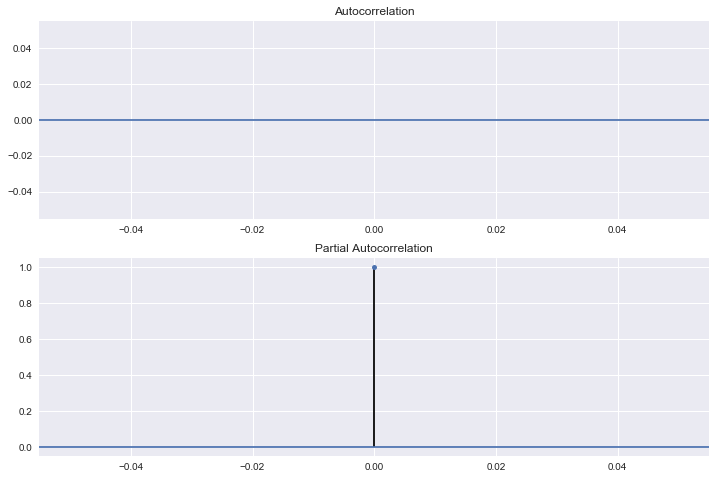

In [2398]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resids, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resids, lags=40, ax=ax2)
plt.show()

In [2399]:
pred_comments = sarimax_comments.predict(start="2017-12-31",
                                         end="2018-01-31",
                                         exog=testing_comments.values.astype('float64'),
                                         dynamic=False)

C:\Users\Laurens\Anaconda3\lib\site-packages\statsmodels\base\data.py:131: RuntimeWarning: invalid value encountered in reduce
  const_idx = np.where(self.exog.ptp(axis=0) == 0)[0].squeeze()
C:\Users\Laurens\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\Laurens\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


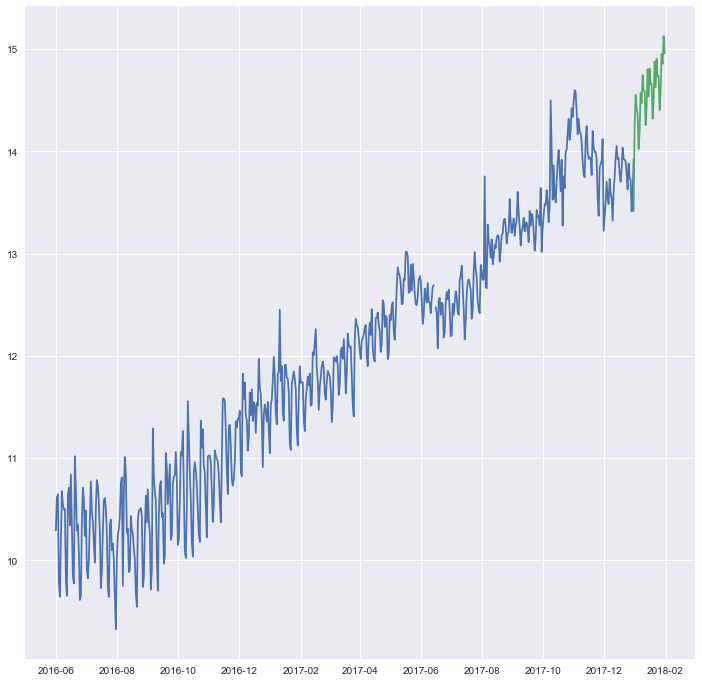

In [2400]:
plt.figure(figsize=(12,12))

plt.plot(comments_log)
plt.plot(pred_comments)

In [2401]:
from scipy.special import inv_boxcox
lambda_bx =  boxcox_normmax(comments_all+1)

inverted_comments = inv_boxcox(comments_log, lambda_bx)
inverted_comments_preds = inv_boxcox(pred_comments, lambda_bx)

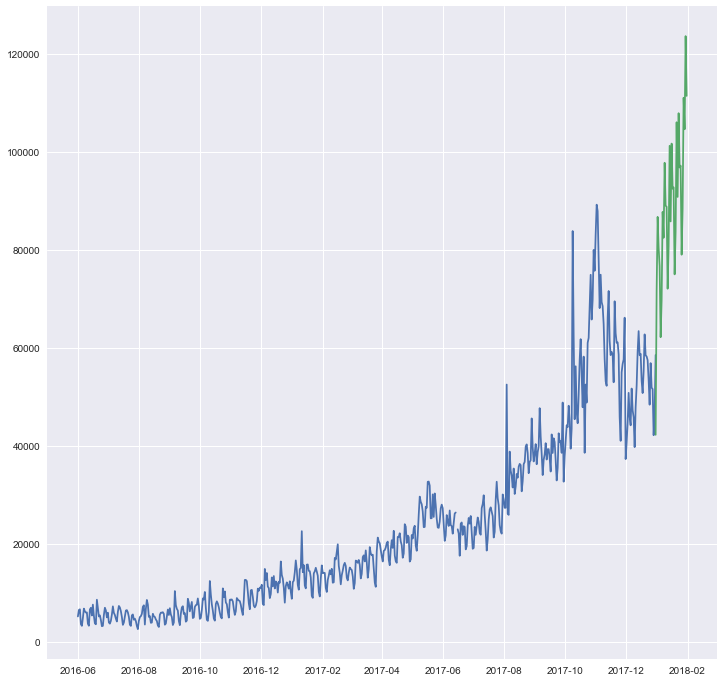

In [2402]:
plt.figure(figsize=(12,12))

plt.plot(inverted_comments)
plt.plot(inverted_comments_preds)

In [2362]:
pred_comments

2017-12-31    13.496563
2018-01-01    15.009049
2018-01-02    15.023383
2018-01-03    15.048588
2018-01-04    15.033483
2018-01-05    15.048119
2018-01-06    15.061902
2018-01-07    15.079381
2018-01-08    15.514718
2018-01-09    15.529920
2018-01-10    15.549717
2018-01-11    15.561895
2018-01-12    15.578625
2018-01-13    15.594842
2018-01-14    15.597169
2018-01-15    15.512947
2018-01-16    15.528525
2018-01-17    15.541561
2018-01-18    15.564560
2018-01-19    15.577503
2018-01-20    15.590257
2018-01-21    15.607564
2018-01-22    15.400992
2018-01-23    15.419959
2018-01-24    15.422232
2018-01-25    15.444963
2018-01-26    15.462099
2018-01-27    15.478322
2018-01-28    15.505840
2018-01-29    15.379452
2018-01-30    15.394624
2018-01-31    15.400909
Freq: D, dtype: float64

In [2347]:
X_comments_log = X_comments_log.asfreq('D')

In [2346]:
comments_log = comments_log.asfreq('D')

# Decompose

In [1953]:
validation_views_X

,adobeartificialintelligence,amazonartificialintelligence,appleartificialintelligence,artificialintelligence,facebookartificialintelligence,googleartificialintelligence,ibmartificialintelligence,intelartificialintelligence,microsoftartificialintelligence,nvidiaartificialintelligence,oracleartificialintelligence,samsungartificialintelligence,sapartificialintelligence,twitterartificialintelligence,amazon_x,apple_x,facebook_x,google_x,hp(hewlettpackard)_x,intel_x,microsoft_x,qualcomm_x,samsung_x,#ai,#iot,#machinelearning,amazon_y,apple_y,facebook_y,google_y,hp(hewlettpackard)_y,intel_y,microsoft_y,qualcomm_y,samsung_y,adobeartificialintelligence_diff,amazonartificialintelligence_diff,appleartificialintelligence_diff,artificialintelligence_diff,facebookartificialintelligence_diff,googleartificialintelligence_diff,ibmartificialintelligence_diff,intelartificialintelligence_diff,microsoftartificialintelligence_diff,nvidiaartificialintelligence_diff,oracleartificialintelligence_diff,samsungartificialintelligence_diff,sapartificialintelligence_diff,twitterartificialintelligence_diff,amazon_x_diff,apple_x_diff,facebook_x_diff,google_x_diff,hp(hewlettpackard)_x_diff,intel_x_diff,microsoft_x_diff,qualcomm_x_diff,samsung_x_diff,amazon_y_diff,apple_y_diff,facebook_y_diff,google_y_diff,hp(hewlettpackard)_y_diff,intel_y_diff,microsoft_y_diff,qualcomm_y_diff,samsung_y_diff,amazon-ordered-innovate,apple-ordered-innovate,facebook-ordered-innovate,google-ordered-innovate,hp(hewlettpackard)-ordered-innovate,intel-ordered-innovate,microsoft-ordered-innovate,qualcomm-ordered-innovate,samsung-ordered-innovate,amazon-ordered-tech,apple-ordered-tech,facebook-ordered-tech,google-ordered-tech,hp(hewlettpackard)-ordered-tech,intel-ordered-tech,microsoft-ordered-tech,qualcomm-ordered-tech,samsung-ordered-tech,amazon_combined,apple_combined,facebook_combined,google_combined,intel_combined,microsoft_combined,qualcomm_combined,samsung_combined,0,0_x,0_y,spending_alph,spending_sap,ge_spend_diff,nvidia_spend_diff,alpha_spend_diff,sap_spend_diff,gp_set_0,gp_set_1,gp_set_2,gp_set_3,gp_set_4,gp_set_5,gp_set_6,gp_set_7,gp_set_8,gp_set_9,gp_set_10,gp_set_11,gp_set_12,gp_set_13,gp_set_14,gp_set_15,gp_set_16,gp_set_17,gp_set_18,gp_set_19


# Validation

In [1982]:
from sklearn.metrics import mean_squared_error

#simple ridge
val_preds_views = ridge_model_views.predict(validation_views_X)
val_preds_comments = ridge_model_comments.predict(validation_comments_X)

print("- Views RMSE:", 
      np.sqrt(mean_squared_error(validation_views, val_preds_views)))
print("- Comments RMSE:", 
      np.sqrt(mean_squared_error(validation_comments, val_preds_comments)))

print("-"*50)

print("- Views MAPE:", 
      MAPE(validation_views, val_preds_views))
print("- Comments MAPE:", 
      MAPE(validation_comments, val_preds_comments))



- Views RMSE: 6.1648437819284725
- Comments RMSE: 0.311508697281224
--------------------------------------------------
- Views MAPE: 153.94622477430985
- Comments MAPE: 100.47002713420049


In [1240]:
#simple elasticnet
val_preds_views = elastic_views.predict(validation_views_X)
val_preds_comments = elastic_cv_comments.predict(validation_comments_X)

print("- Views RMSE:", 
      np.sqrt(mean_squared_error(validation_views, val_preds_views)))
print("- Comments RMSE:", 
      np.sqrt(mean_squared_error(validation_comments, val_preds_comments)))

print("-"*50)

print("- Views MAPE:", 
      MAPE(validation_views, val_preds_views))
print("- Comments MAPE:", 
      MAPE(validation_comments, val_preds_comments))

- Views RMSE: 4.104038810114765
- Comments RMSE: 0.23246172605217555
--------------------------------------------------
- Views MAPE: 102.49194378166877
- Comments MAPE: 115.72530251719792


In [1987]:
#xgboost
val_preds_views = xgb_opt_views.predict(validation_views_X)
val_preds_comments = xgb_opt_comments.predict(validation_comments_X)


print("- Views RMSE:", 
      np.sqrt(mean_squared_error(validation_views, val_preds_views)))
print("- Comments RMSE:", 
      np.sqrt(mean_squared_error(validation_comments, val_preds_comments)))

print("-"*50)

print("- Views MAPE:", 
      MAPE(validation_views, val_preds_views))
print("- Comments MAPE:", 
      MAPE(validation_comments, val_preds_comments))

- Views RMSE: 11.30191452731376
- Comments RMSE: 0.30957437397695686
--------------------------------------------------
- Views MAPE: 334.2306753501398
- Comments MAPE: 99.79962228600327


In [1983]:
#kernelridge
val_preds_views = kr_fit_v.predict(validation_views_X)
val_preds_comments = kr_fit_c.predict(validation_comments_X)


print("- Views RMSE:", 
      np.sqrt(mean_squared_error(validation_views, val_preds_views)))
print("- Comments RMSE:", 
      np.sqrt(mean_squared_error(validation_comments, val_preds_comments)))

print("-"*50)

print("- Views MAPE:", 
      MAPE(validation_views, val_preds_views))
print("- Comments MAPE:", 
      MAPE(validation_comments, val_preds_comments))

- Views RMSE: 8.666574080825932
- Comments RMSE: 0.31332345108175674
--------------------------------------------------
- Views MAPE: 212.66844362299668
- Comments MAPE: 97.50457692651956


In [1984]:
#svr
val_preds_views = svr_fit_v.predict(validation_views_X)
val_preds_comments = svr_fit_c.predict(validation_comments_X)


print("- Views RMSE:", 
      np.sqrt(mean_squared_error(validation_views, val_preds_views)))
print("- Comments RMSE:", 
      np.sqrt(mean_squared_error(validation_comments, val_preds_comments)))

print("-"*50)

print("- Views MAPE:", 
      MAPE(validation_views, val_preds_views))
print("- Comments MAPE:", 
      MAPE(validation_comments, val_preds_comments))

- Views RMSE: 5.147416171403653
- Comments RMSE: 0.31234392877949396
--------------------------------------------------
- Views MAPE: 98.61208303632672
- Comments MAPE: 95.9034315989955


tests:
- w/o spending & combined:
    - Views RMSE: 5.09161706427318
    - Comments RMSE: 0.24709802894114022
- with spending & combined:
    - Views RMSE: 6.575449024023794
    - Comments RMSE: 0.22705548691202845
- with spending, combined & outliers rem:
    - Views RMSE: 6.858040644422753
    - Comments RMSE: 0.2141332362050984
- nvid/ge/intel spending:
    - Views RMSE: 6.948970570286423
    - Comments RMSE: 0.19514197797764657
- spendings + derivs:
    - Views RMSE: 5.410114005128732
    - Comments RMSE: 0.22730792816367174
- xgboost:
    - Views RMSE: 6.635778219916577
    - Comments RMSE: 0.23258810602005936
- xgboost better alpha:
    - Views RMSE: 6.491574322304902
    - Comments RMSE: 0.23258810602005936

# Stack

In [2228]:
testing_views.columns[-30:]

Index(['samsung_combined', '0', '0_x', '0_y', 'spending_alph', 'spending_sap',
       'ge_spend_diff', 'nvidia_spend_diff', 'alpha_spend_diff',
       'sap_spend_diff', 'gp_set_gp_set_0', 'gp_set_gp_set_1',
       'gp_set_gp_set_2', 'gp_set_gp_set_3', 'gp_set_gp_set_4',
       'gp_set_gp_set_5', 'gp_set_gp_set_6', 'gp_set_gp_set_7',
       'gp_set_gp_set_8', 'gp_set_gp_set_9', 'gp_set_gp_set_10',
       'gp_set_gp_set_11', 'gp_set_gp_set_12', 'gp_set_gp_set_13',
       'gp_set_gp_set_14', 'gp_set_gp_set_15', 'gp_set_gp_set_16',
       'gp_set_gp_set_17', 'gp_set_gp_set_18', 'gp_set_gp_set_19'],
      dtype='object')

In [2237]:
# views
ridge_preds1 = ridge_model_views.predict(testing_views)
stack_gen_preds1 = stack_gen_model_v.predict(np.array(testing_views))
xgb_preds1 = xgb_opt_views.predict(testing_views)
svr_preds1 = svr_fit_v.predict(testing_views)
kr_preds1 = kr_fit_v.predict(testing_views)

In [2240]:
stacked_preds_v = ((0.2*ridge_preds1) + (0.2*svr_preds1) + (0.2*kr_preds1) + 
               (0.2*xgb_preds1) +  (0.2*stack_gen_preds1))

In [2239]:
# comments
ridge_preds2 = ridge_model_comments.predict(testing_comments)
stack_gen_preds2 = stack_gen_model.predict(np.array(testing_comments))
xgb_preds2 = xgb_opt_comments.predict(testing_comments)
svr_preds2 = svr_fit_c.predict(testing_comments)
kr_preds2 = kr_fit_c.predict(testing_comments)

In [2391]:
stacked_preds_c = ((0.2*ridge_preds2) + (0.2*svr_preds2) + (0.2*kr_preds2) + 
               (0.2*xgb_preds2) +  (0.2*stack_gen_preds2))

In [2393]:
stacked_preds_c

array([-0.00058638, -0.00866454,  0.00129418,  0.0046948 ,  0.00465687,
        0.0045758 ,  0.00010389,  0.00517128,  0.00515239, -0.00138986,
        0.00518516, -0.00154676,  0.00525713, -0.00518901,  0.00845904,
        0.00844778, -0.00163039,  0.00882155,  0.00850358,  0.0085157 ,
        0.00036512, -0.00126998, -0.00129349, -0.00118703, -0.00122144,
       -0.00121681, -0.00120683,  0.01651388,  0.008583  ,  0.00859631,
        0.00833172])

# Graph

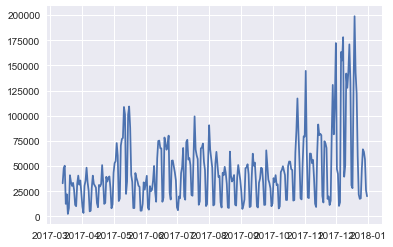

In [2261]:
plt.plot(views_all)

In [2251]:
def inverse_difference(last_ob, value):
    return value + last_ob

invert_views = [inverse_difference(views_z[i], views_zz[i]) for i in range(len(views_zz))]

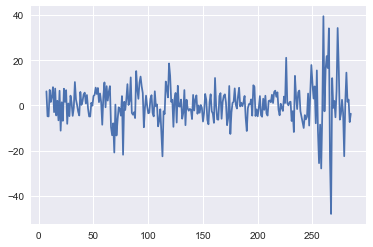

In [2252]:
plt.plot(invert_views)

In [2254]:
invert_views2 = [inverse_difference(views_log[i], views_z[i]) for i in range(len(views_z))]

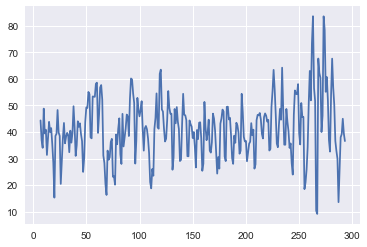

In [2255]:
plt.plot(invert_views2)

In [2259]:
from scipy.special import inv_boxcox
lambda_bx =  boxcox_normmax(views_all+1)

inverted3_v = inv_boxcox(invert_views2, lambda_bx)

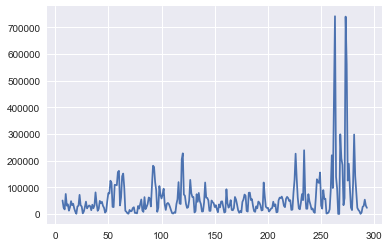

In [2260]:
plt.plot(inverted3_v)

# Prediction

In [2370]:
submission = pd.read_csv("challenge_submission_template.csv")

In [2414]:
submission

,date,comment_forecast,pv_forecast
0,1/1/18,71644.0,92009.0
1,1/2/18,86789.0,285861.0
2,1/3/18,80523.0,315582.0
3,1/4/18,76749.0,171812.0
4,1/5/18,62240.0,128803.0
5,1/6/18,69727.0,63746.0
6,1/7/18,87805.0,48273.0
7,1/8/18,82536.0,53699.0
8,1/9/18,97837.0,114310.0
9,1/10/18,89093.0,137208.0


In [2413]:
submission.iloc[:,2] = view_preds.round()

In [2408]:
submission.iloc[:,1] = comments_preds.round()

In [2411]:
view_preds = inverted_views_preds[1:]

In [2412]:
view_preds = view_preds.reset_index(drop=True)

In [2405]:
comments_preds = inverted_comments_preds[1:]

In [2407]:
comments_preds = comments_preds.reset_index(drop=True)

In [2415]:
submission.to_csv("DataWhales_predictions.csv", index=False)